# Project Unsupervised Learning: Trade & Ahead Project



### Context
The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.




### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Description

* Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market

* Company: Name of the company

* GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations

* GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations

* Current Price: Current stock price in dollars

* Price Change: Percentage change in the stock price in 13 weeks

* Volatility: Standard deviation of the stock price over the past 13 weeks

* ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)

* Cash Ratio: The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities

* Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)

* Net Income: Revenues minus expenses, interest, and taxes (in dollars)
Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)

* Estimated Shares Outstanding: Company's stock currently held by all its shareholders

* P/E Ratio: Ratio of the company's current stock price to the earnings per share

* P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

### Problem Definition

Trade&Ahead, a financial consultancy firm, aims to provide clients with personalized investment strategies by optimizing portfolio diversification and risk management. To assist investors in navigating the vast number of stocks available, the firm has enlisted a Data Scientist to analyze stock price data and key financial indicators of companies listed on the New York Stock Exchange. The objective is to perform cluster analysis to group stocks with similar characteristics, enabling investors to identify patterns, minimize correlation, and make informed decisions. By uncovering insights into stock behavior across different economic sectors, this analysis will help investors enhance portfolio performance and reduce exposure to market volatility.

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

### Data Background and Contents

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Loading the data and Displaying first few rows of data

In [3]:
# read the data
stock = pd.read_csv('/content/drive/My Drive/Colab Notebooks/stock_data.csv')
data = stock.copy()
# returns the first 5 rows
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [4]:
data.tail()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,939457327.6,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,435353535.4,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,188461538.5,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,257892500.0,22.749999,-0.063096
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,339000000,0.68,498529411.8,70.470585,1.723068


###Checking Shape of the dataset

In [5]:
data.shape

(340, 15)

* There is a total of 340 rows for the 15 columns mentioned above.

###Checking datatypes of columns in the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

* There are a total of 15 columns, with 11 being numeric and 4 classified as object type.
* These object-type columns are inherently numeric and should be converted to integer or float data types.

###Checking for duplicate values

In [7]:
data.duplicated().sum()

0

There are no duplicate values

###Checking for missing values

In [8]:
data.isnull().sum()

,0
Ticker Symbol,0
Security,0
GICS Sector,0
GICS Sub Industry,0
Current Price,0
Price Change,0
Volatility,0
ROE,0
Cash Ratio,0
Net Cash Flow,0


There are no missing values

###Statistical Summary of Dataset

In [9]:
data.describe()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
count,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02,3.400000e+02,340.000000,3.400000e+02,340.000000,340.000000
mean,80.862345,4.078194,1.525976,39.597059,70.023529,5.553762e+07,1.494385e+09,2.776662,5.770283e+08,32.612563,-1.718249
std,98.055086,12.006338,0.591798,96.547538,90.421331,1.946365e+09,3.940150e+09,6.587779,8.458496e+08,44.348731,13.966912
min,4.500000,-47.129693,0.733163,1.000000,0.000000,-1.120800e+10,-2.352800e+10,-61.200000,2.767216e+07,2.935451,-76.119077
25%,38.555000,-0.939484,1.134878,9.750000,18.000000,-1.939065e+08,3.523012e+08,1.557500,1.588482e+08,15.044653,-4.352056
50%,59.705000,4.819505,1.385593,15.000000,47.000000,2.098000e+06,7.073360e+08,2.895000,3.096751e+08,20.819876,-1.067170
75%,92.880001,10.695493,1.695549,27.000000,99.000000,1.698108e+08,1.899000e+09,4.620000,5.731175e+08,31.764755,3.917066
max,1274.949951,55.051683,4.580042,917.000000,958.000000,2.076400e+10,2.444200e+10,50.090000,6.159292e+09,528.039074,129.064585


# Observations

* The dataset contains 340 companies and 15 columns describing their details.
* These 15 variables capture various financial and growth-related aspects of each company.
* The dataset provides insights into industry performance based on monetary metrics.
* There are no duplicate or missing values, making it ready for further analysis without preprocessing.

# Exploratory Data Analysis

# Univariate Analysis

In [10]:
def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

###Current Price

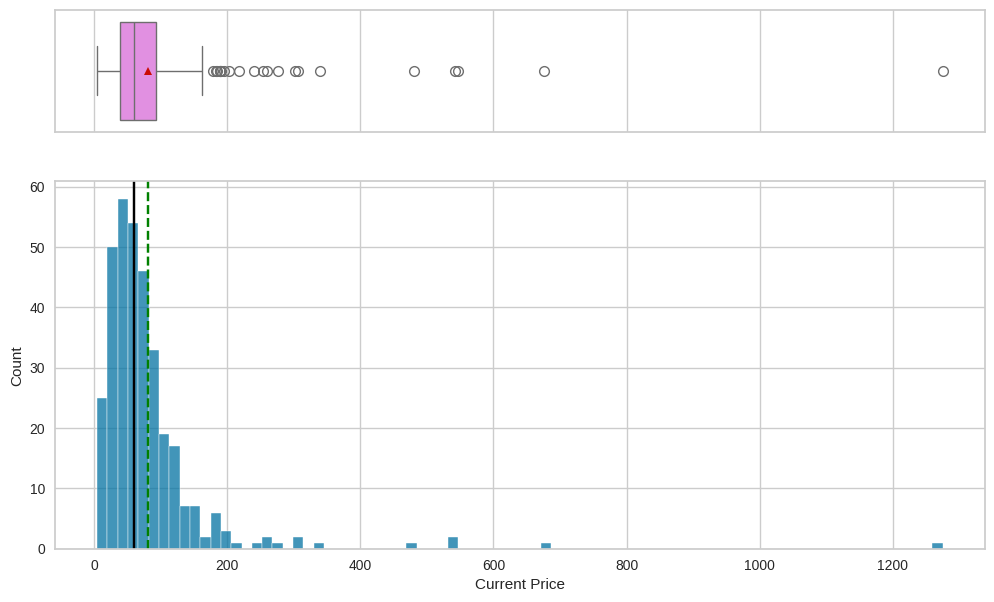

In [11]:
histogram_boxplot(data,"Current Price")

### Observation


The **Current Price** distribution is slightly **right-skewed** and contains **outliers**.

###Price change

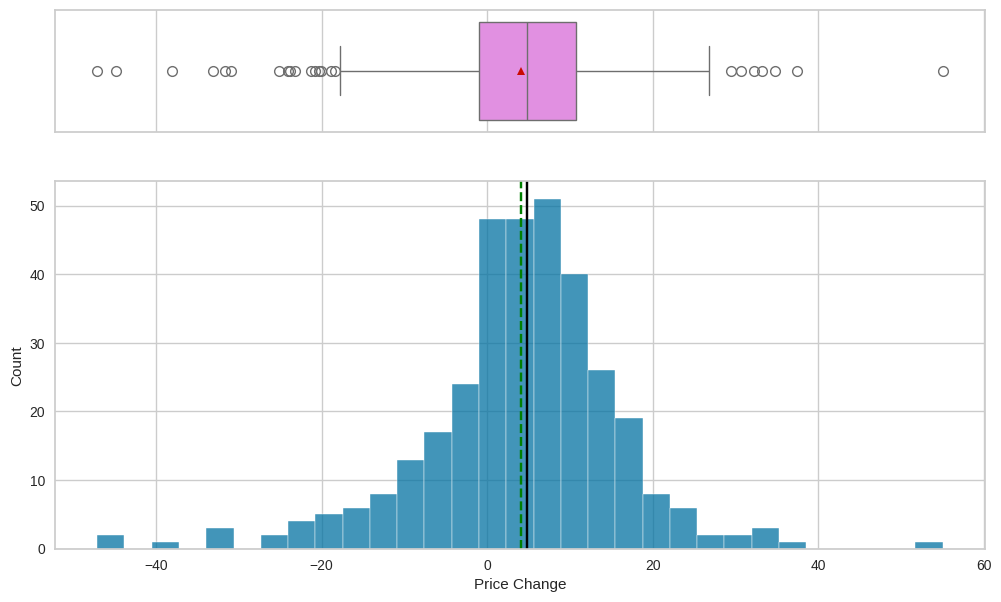

In [12]:
histogram_boxplot(data,"Price Change")

### Observations

Price Change is almost normally distributed and outliers are also present

###Volatility

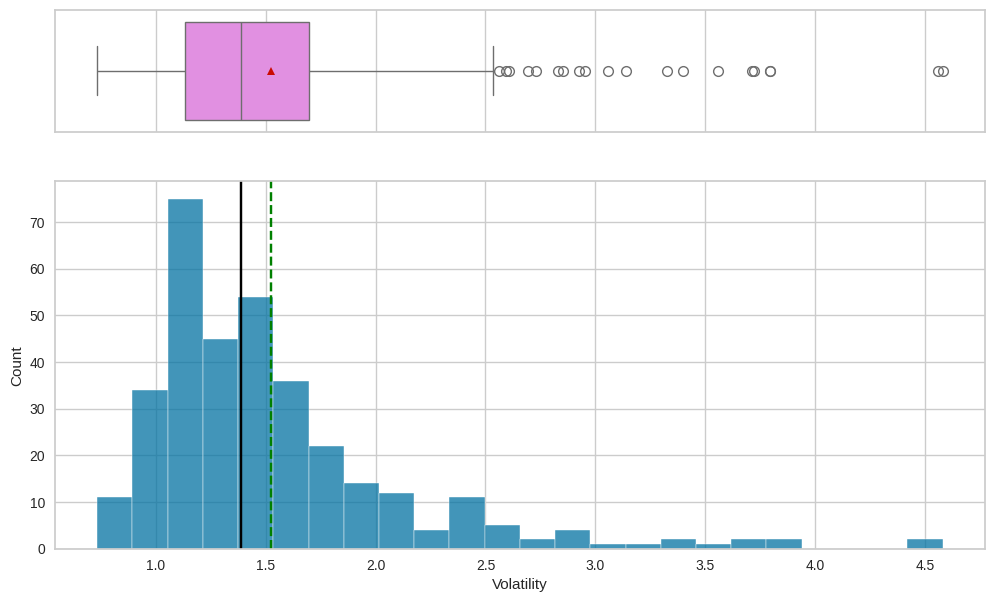

In [13]:
histogram_boxplot(data,"Volatility")

### Obseravtion

The **Volatility** distribution is **right-skewed** and contains **outliers**.

###ROE

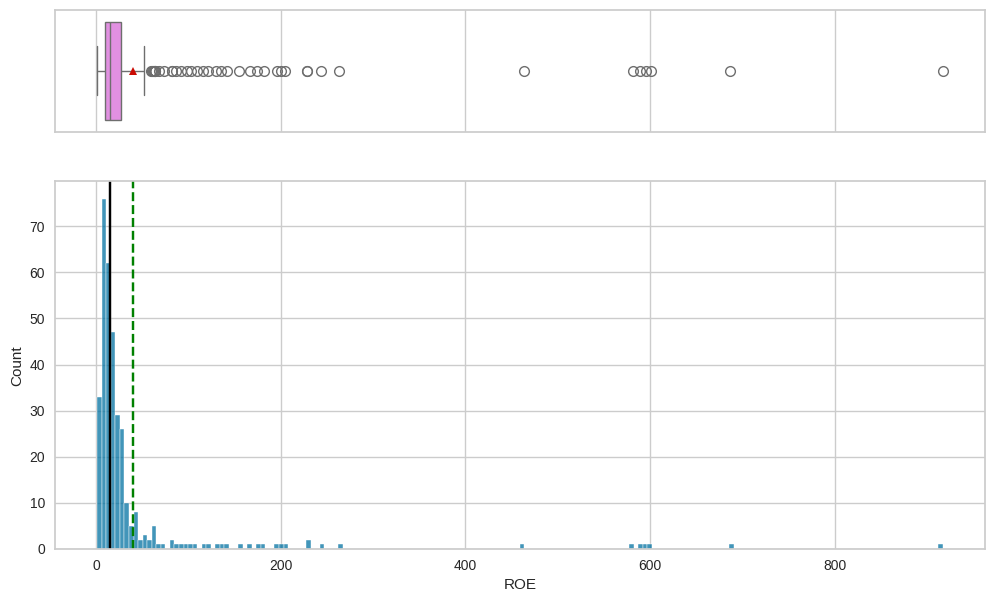

In [14]:
histogram_boxplot(data,"ROE")

###Observation

The **ROE** distribution is **skewed** and contains **outliers**.

###Cash Ratio

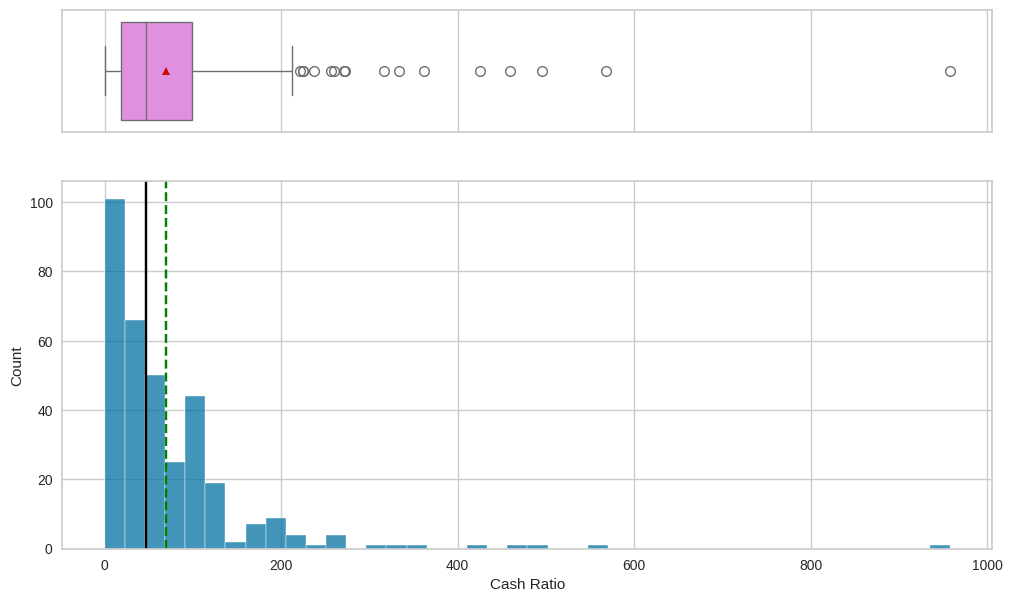

In [15]:
histogram_boxplot(data,"Cash Ratio")

###Observation

The **Cash Ratio** distribution is **right-skewed** and contains **outliers**.

###Net Cash Flow

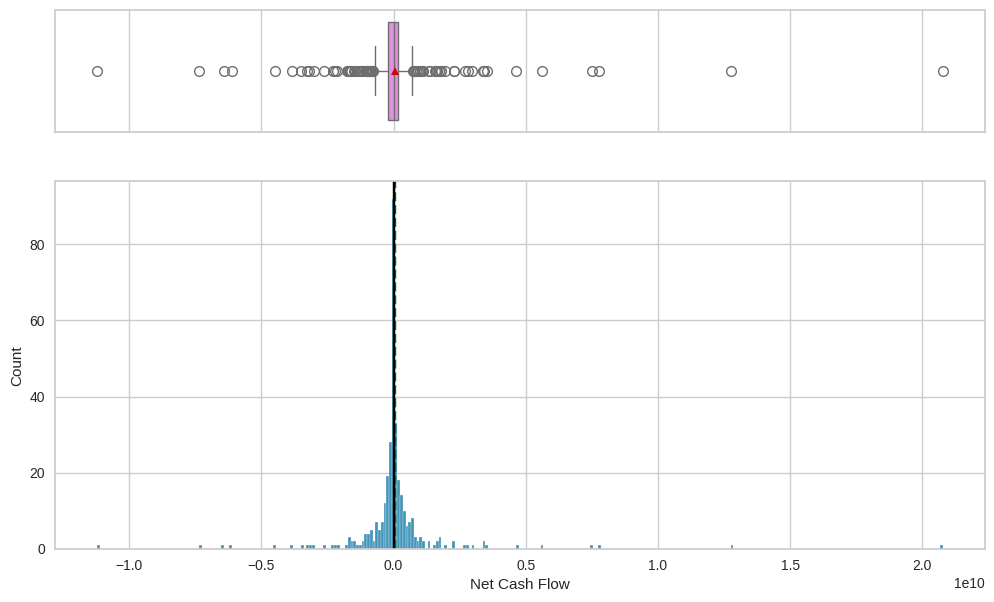

In [16]:
histogram_boxplot(data,"Net Cash Flow")

###Observation

The **Net Cash Flow** distribution is **almost normal** but contains **outliers**.

**Net Income**

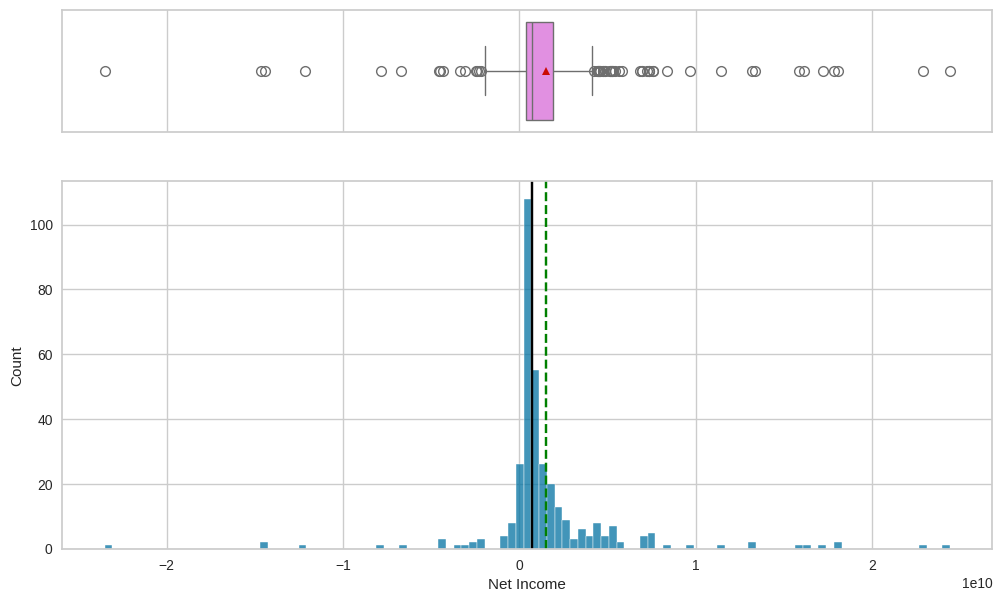

In [17]:
histogram_boxplot(data,"Net Income")

###Observation

The **Net Income** distribution is **right-skewed** and contains **outliers**.

**Earnings per share**

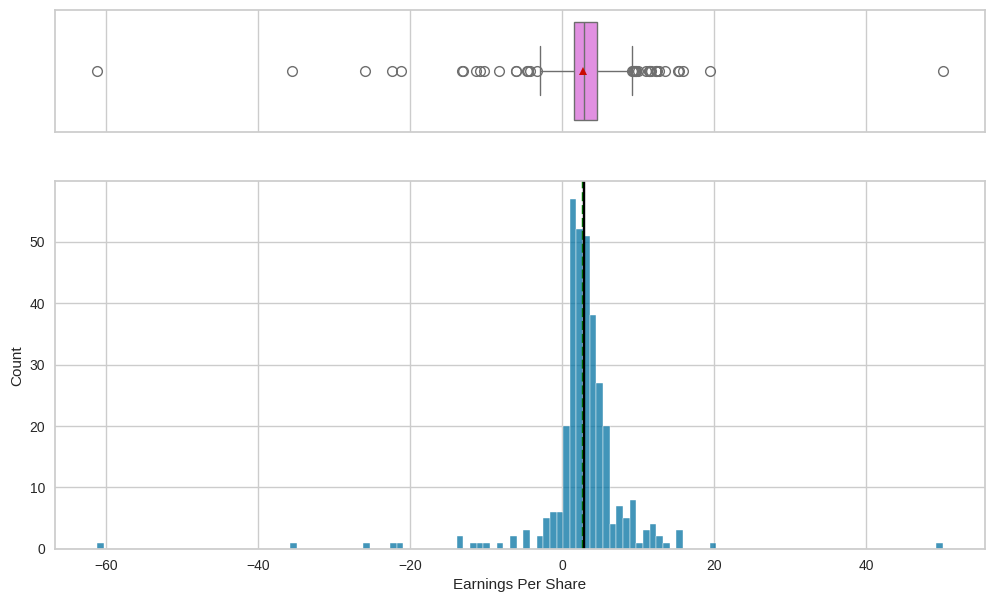

In [18]:
histogram_boxplot(data,"Earnings Per Share")

###Observation

The **Earnings Per Share** distribution is **slightly skewed** and contains **outliers**.

**Estimated Shares Outstanding**

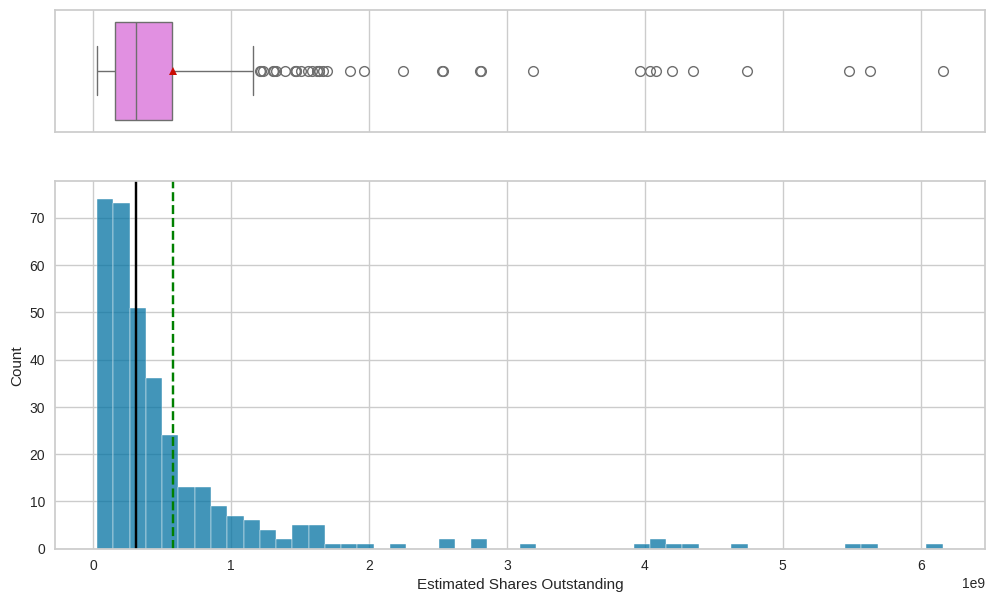

In [19]:
histogram_boxplot(data,"Estimated Shares Outstanding")

###Observation

The **Estimated Shares Outstanding** distribution is **right-skewed** and contains **outliers**.

**P/E Ratio**

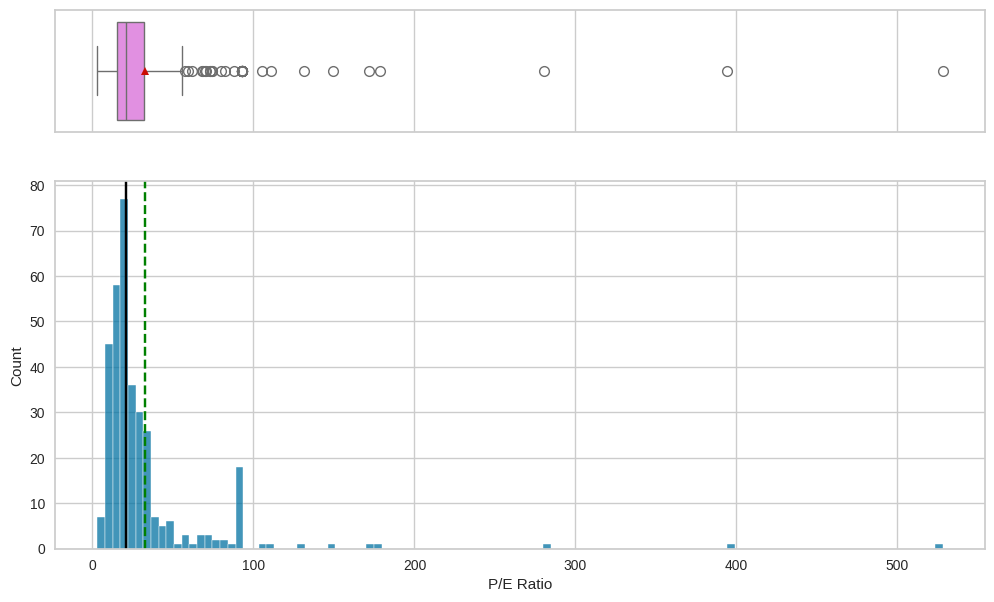

In [20]:
histogram_boxplot(data,"P/E Ratio")

###Observation

The **P/E Ratio** distribution is **right-skewed** and contains **outliers**.

**P/B Ratio**

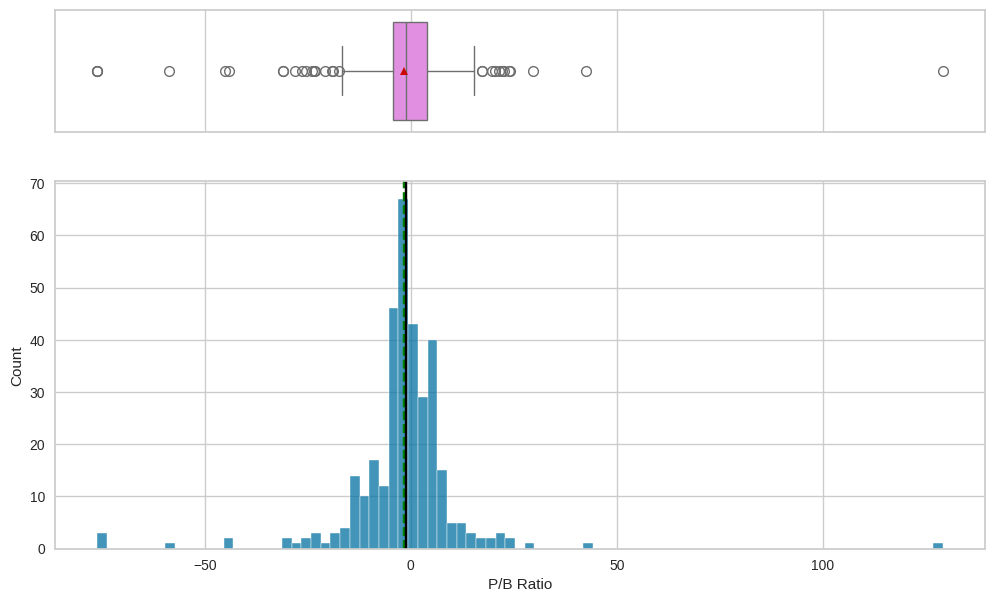

In [21]:
histogram_boxplot(data,"P/B Ratio")

### Observation

The **P/B Ratio** distribution is **right-skewed** and contains **outliers**.

In [22]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()

**GICS Sector**

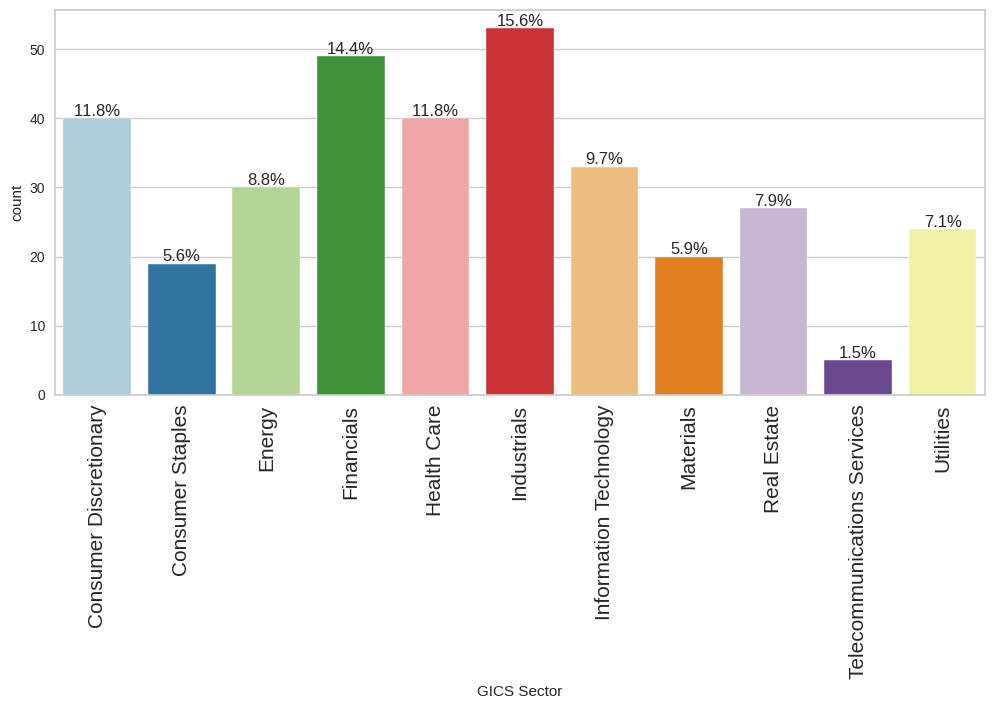

In [23]:
labeled_barplot(data, 'GICS Sector', perc=True)

###Observation

The **Industrials** sector has the highest percentage of companies, followed by **Finance** and then **Consumer Discretionary**.

**GICS Sub Industry**

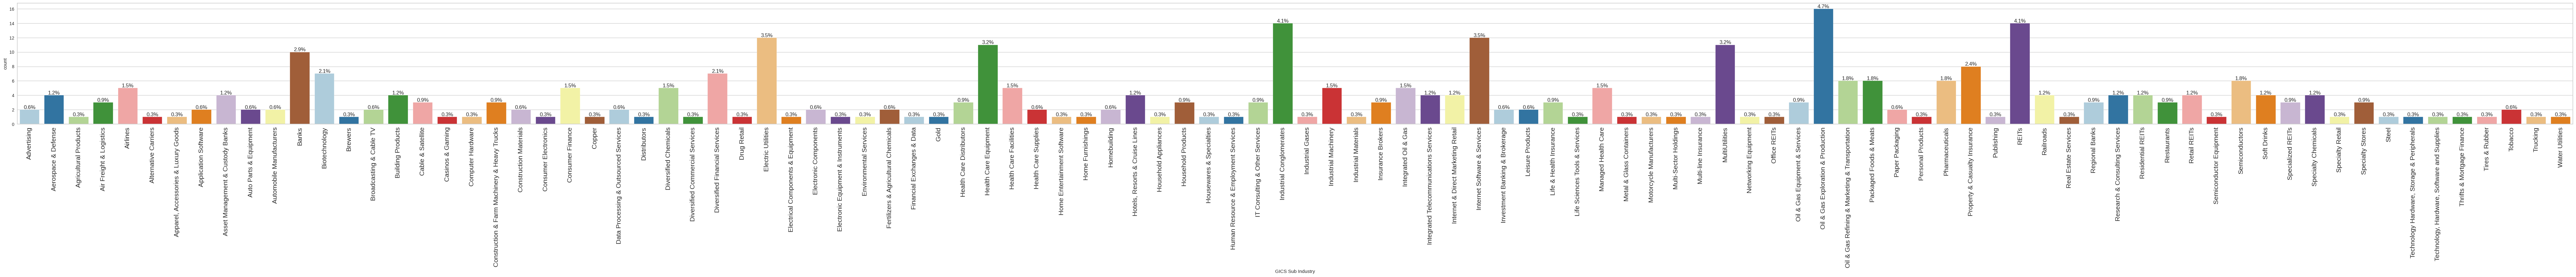

In [24]:
labeled_barplot(data, 'GICS Sub Industry', perc=True)

###Observation

The highest percentage of stocks belong to the **Oil & Gas Exploration and Production** subsector, followed by **REITs** and **Industrial Conglomerates**.

# Bivariate Analysis

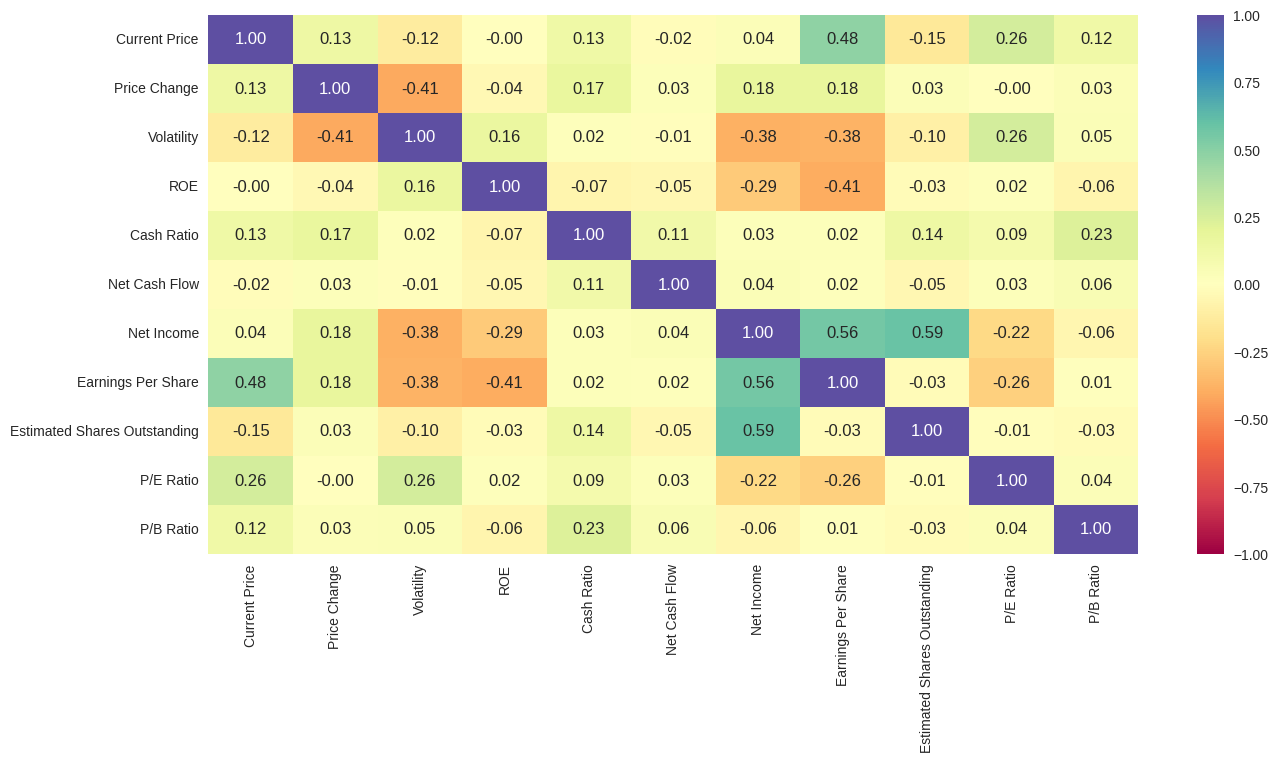

In [25]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    data.select_dtypes(include=np.number).corr(), # Select only numerical features for correlation calculation
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral"
)
plt.show()

###Observation

* **Estimations Per Share** and **Net Income** are **positively correlated**, and similarly, **Net Income** shows a **positive correlation** with **Earnings Per Share**.  
* **Price** and **Volatility** have a **slight negative correlation**, and a similar trend is observed between **ROE** and **Earnings Per Share**.

**Let's determine which economic sector's stocks have experienced the highest average price increase.**

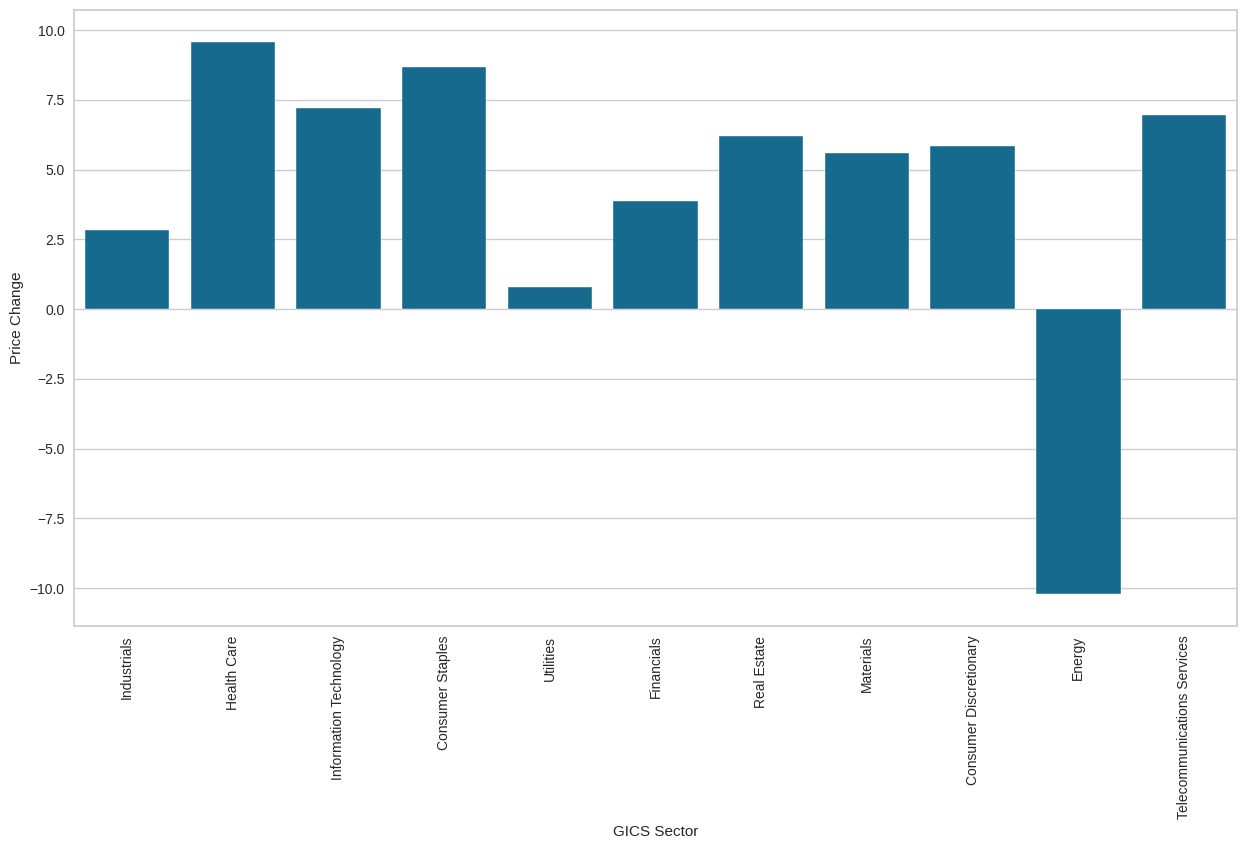

In [26]:
plt.figure(figsize=(15,8))
sns.barplot(data, x='GICS Sector', y='Price Change', ci=False)
plt.xticks(rotation=90)
plt.show()

###Observation

* The **Healthcare** sector shows the **highest price increase**, followed by **Consumer Staples**.  
* A **negative price change** is observed only in the **Energy** sector stocks.

**The cash ratio assesses a company's ability to meet short-term obligations using only cash and cash equivalents. Let's analyze how the average cash ratio differs across economic sectors.**

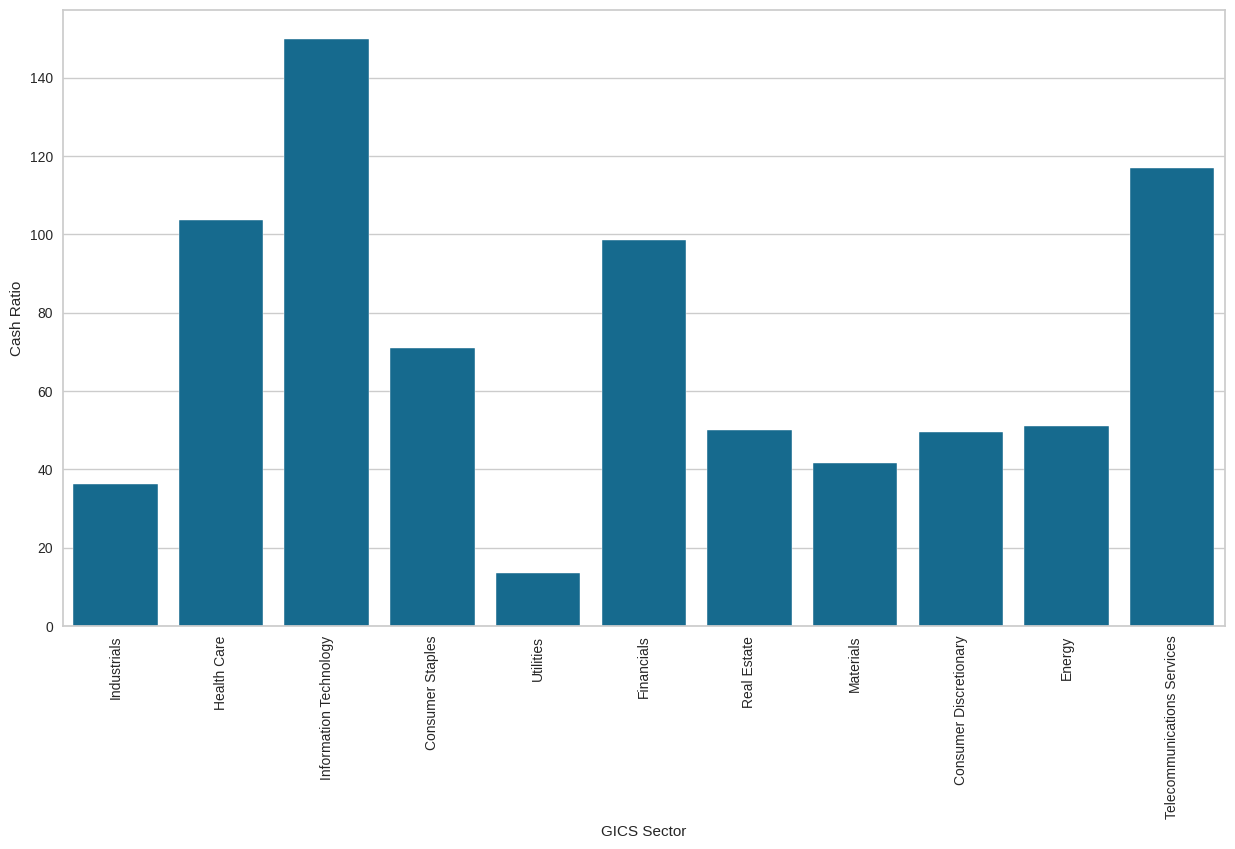

In [27]:
plt.figure(figsize=(15,8))
sns.barplot(data, x='GICS Sector', y='Cash Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

###Observation

* The **P/E Ratio** is **highest** for **Energy** sector stocks, followed by **IT** and **Real Estate** sector stocks.

**P/E ratios indicate the relative value of a company's shares by showing how much an investor is willing to pay per dollar of earnings. Let's examine the average P/E ratio across different economic sectors.**

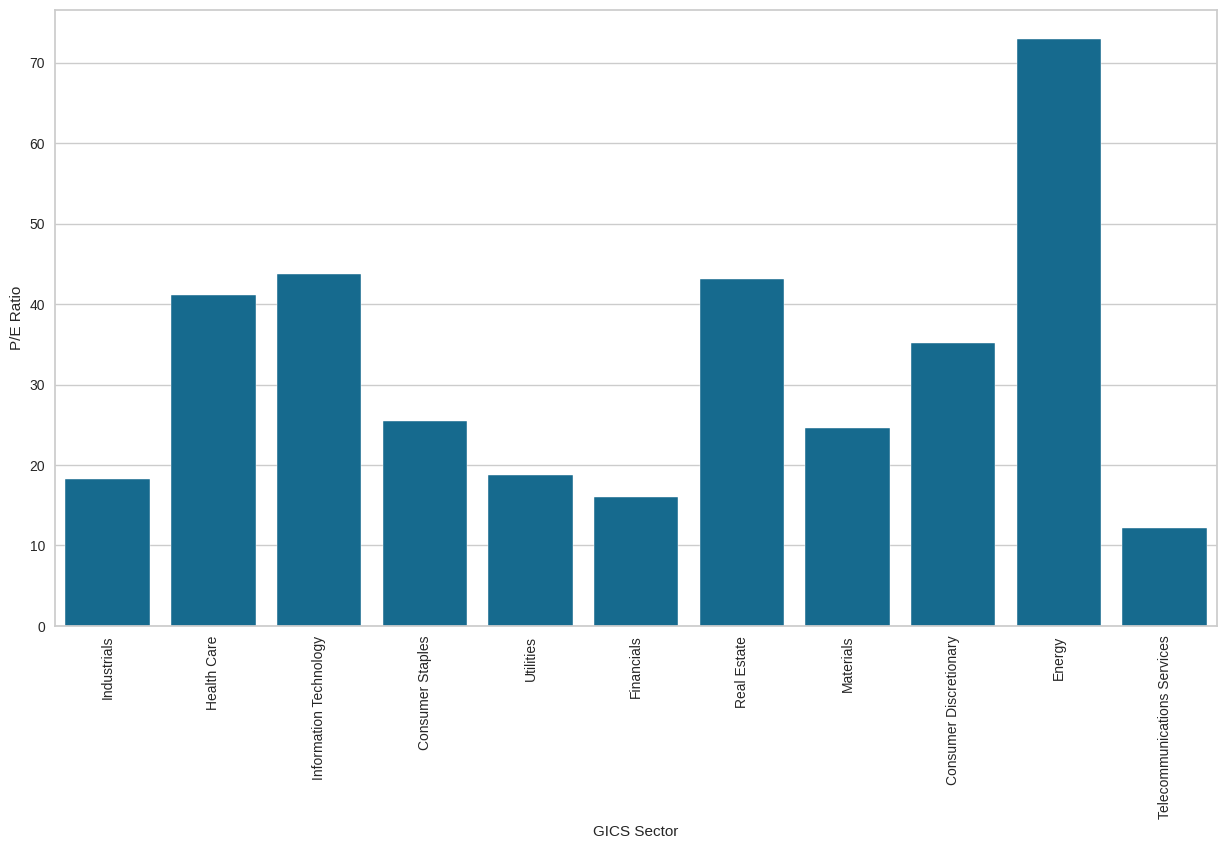

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(data, x='GICS Sector', y='P/E Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

### Observation

Stock **volatility** is **highest** in the **Energy** sector, followed by the **Materials** and **IT** sectors.

**Volatility measures fluctuations in stock prices, with higher volatility indicating sharper price changes and greater investment risk. Let's examine how the average volatility varies across economic sectors.**

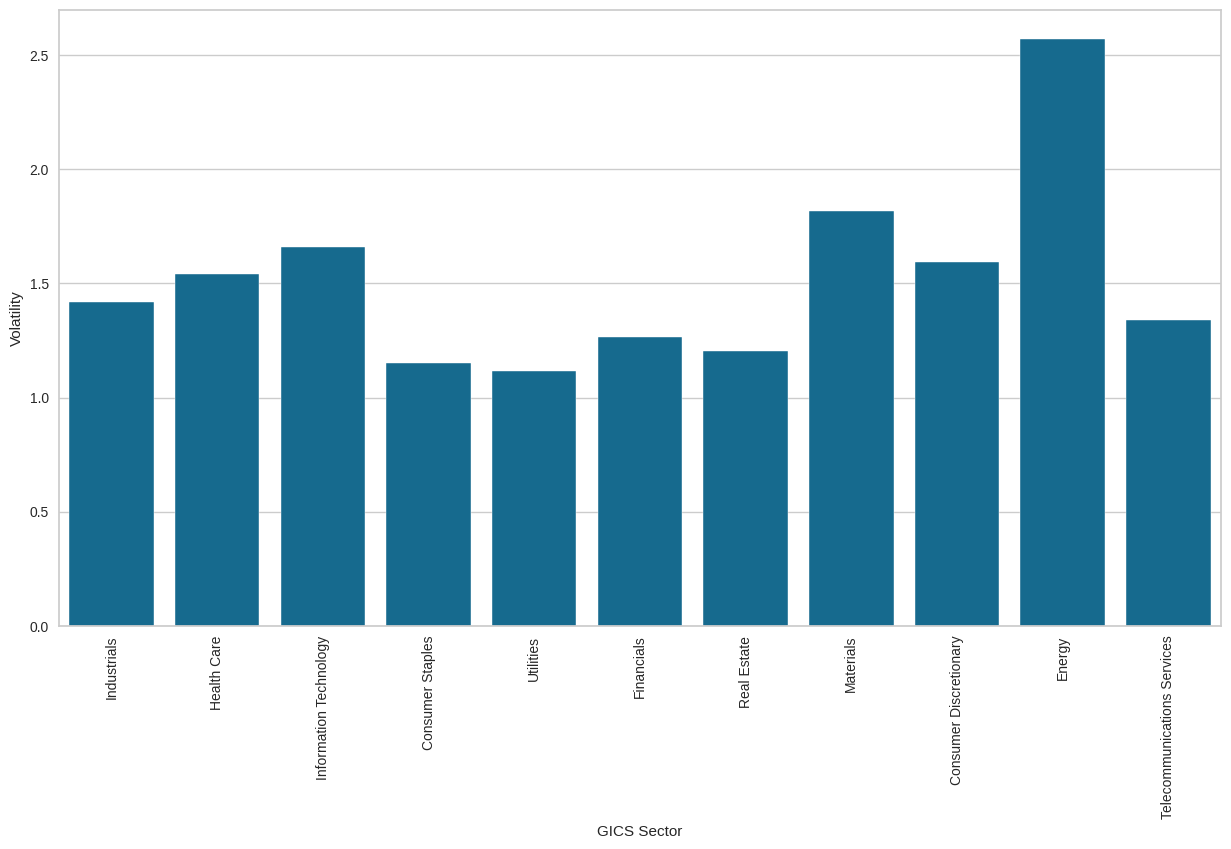

In [29]:
plt.figure(figsize=(15,8))
sns.barplot(data, x='GICS Sector', y='Volatility', ci=False)
plt.xticks(rotation=90)
plt.show()

### Observation

Stock **volatility** is **highest** in the **Energy** sector, followed by the **Materials** and **IT** sectors.

#Data Preprocessing

* Duplicate value check
* Missing value treatment
* Outlier check
* Feature engineering (if needed)
* Any other preprocessing steps (if needed)

**Outlier Check**

Let's create boxplots for all numerical columns to identify any outliers.

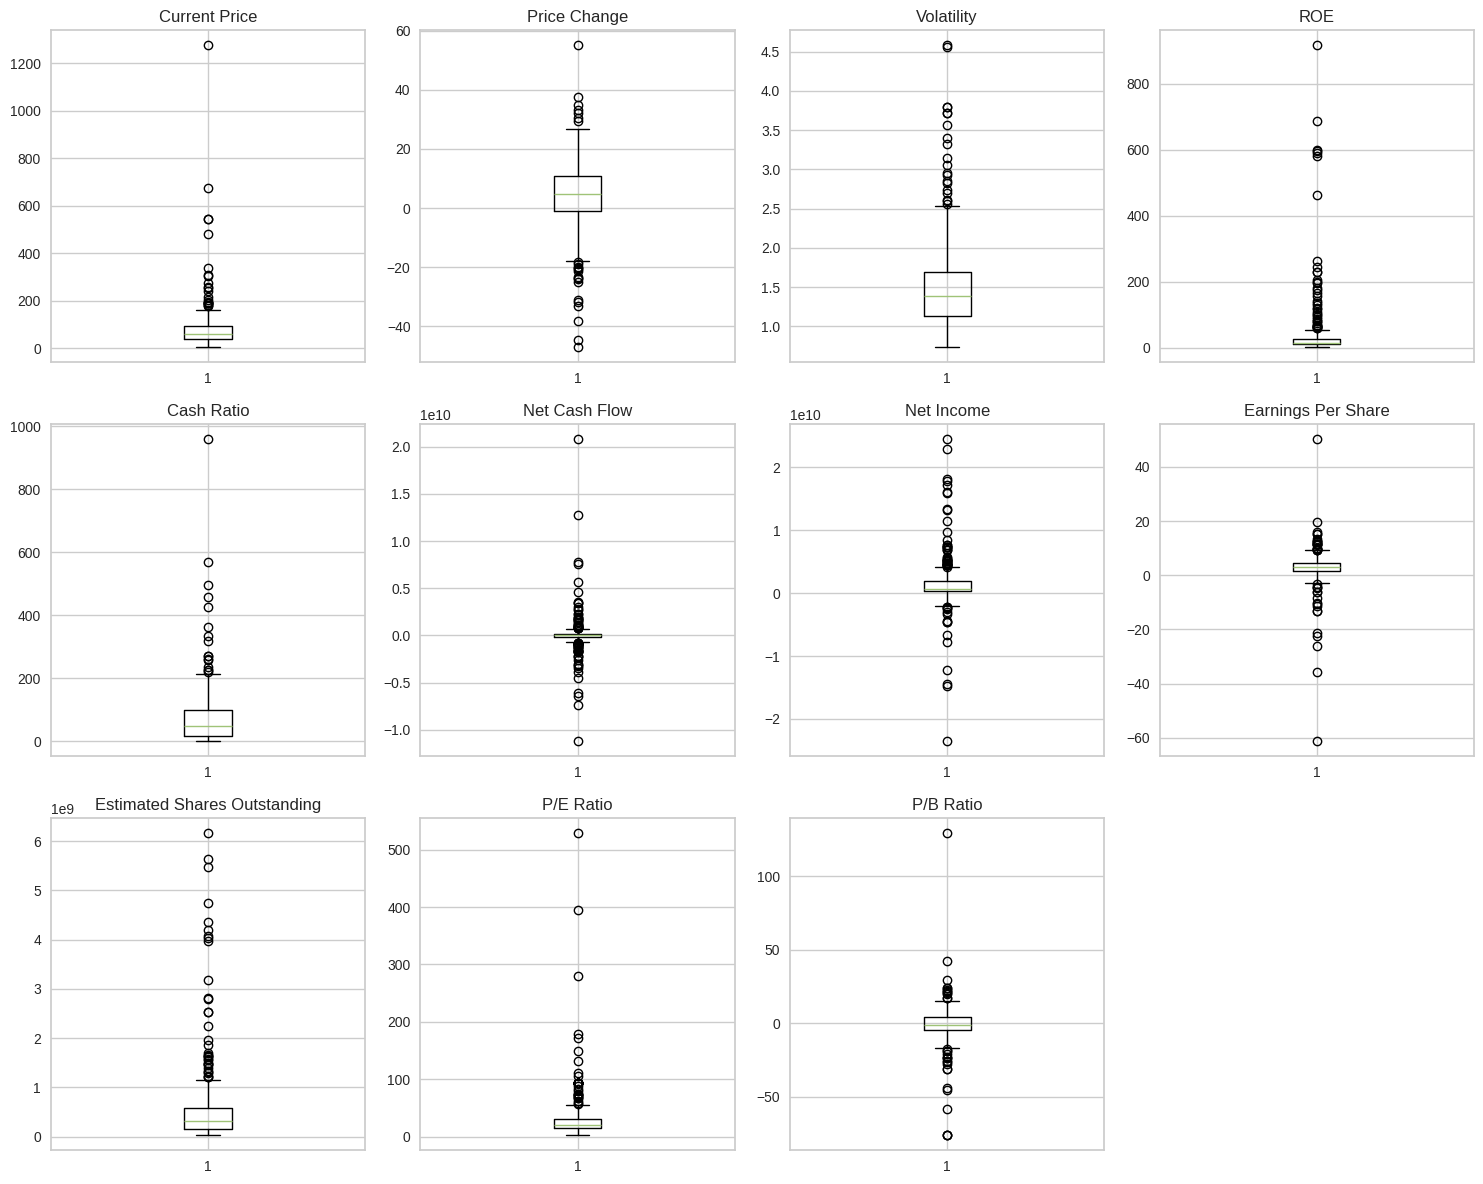

In [30]:
plt.figure(figsize=(15, 12))

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Observation

* Outliers are present in all **numerical columns**.
* We will **not treat the outliers** and will proceed with the **original dataset** for analysis.

**Scaling**

Let's standardize the data before proceeding with clustering.

In [31]:
# scaling the data before clustering
scaler = StandardScaler()
subset = data[numeric_columns].copy()
subset_scaled = scaler.fit_transform(subset)

In [32]:
# creating a dataframe of the scaled columns
subset_scaled_data = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_data.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


All **numerical columns** in the dataset have been **scaled**.

# K Means Clustering


##Elbowplot

In [33]:
k_means_data = subset_scaled_data.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.3862098789299604
Number of Clusters: 3 	Average Distortion: 2.33620927590848
Number of Clusters: 4 	Average Distortion: 2.219050563833442
Number of Clusters: 5 	Average Distortion: 2.133404401901685
Number of Clusters: 6 	Average Distortion: 2.081503686093715
Number of Clusters: 7 	Average Distortion: 2.0045413402786814
Number of Clusters: 8 	Average Distortion: 1.9864237824874411
Number of Clusters: 9 	Average Distortion: 1.956222103389025
Number of Clusters: 10 	Average Distortion: 1.9360473996664198
Number of Clusters: 11 	Average Distortion: 1.8615942883461607
Number of Clusters: 12 	Average Distortion: 1.8219574388532505
Number of Clusters: 13 	Average Distortion: 1.7936924742607907
Number of Clusters: 14 	Average Distortion: 1.7567842179093438


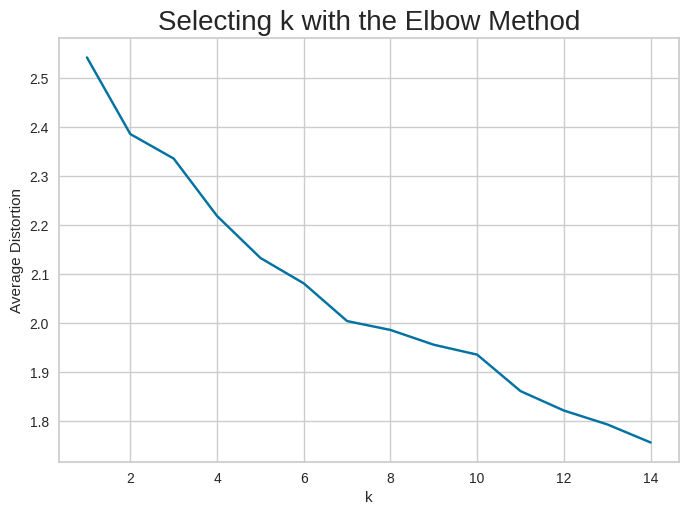

In [34]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_data)
    prediction = model.predict(k_means_data)
    distortion = (
        sum(np.min(cdist(k_means_data, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_data.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

The **elbow curve** suggests an appropriate **k value** between **6 and 7**.

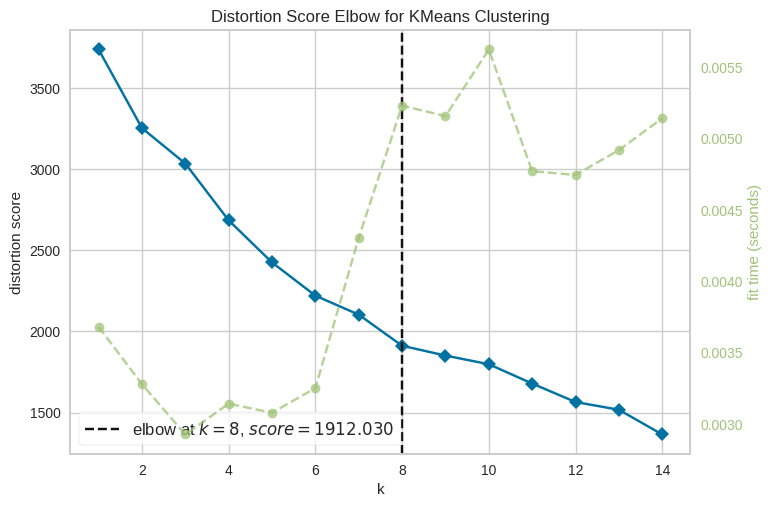

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_data)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

According to the **Elbow Visualizer**, the optimal **k value** is **6**.

##Silhouette scores

For n_clusters = 2, the silhouette score is 0.45335782729503565)
For n_clusters = 3, the silhouette score is 0.40374060030338865)
For n_clusters = 4, the silhouette score is 0.4246430808437099)
For n_clusters = 5, the silhouette score is 0.4381539778147092)
For n_clusters = 6, the silhouette score is 0.40869599703024256)
For n_clusters = 7, the silhouette score is 0.1207450219233897)
For n_clusters = 8, the silhouette score is 0.3693991650696542)
For n_clusters = 9, the silhouette score is 0.35185096182499204)
For n_clusters = 10, the silhouette score is 0.32950073703610283)
For n_clusters = 11, the silhouette score is 0.1486586842527321)
For n_clusters = 12, the silhouette score is 0.15784241071085106)
For n_clusters = 13, the silhouette score is 0.15646997458716602)
For n_clusters = 14, the silhouette score is 0.16253506827999134)


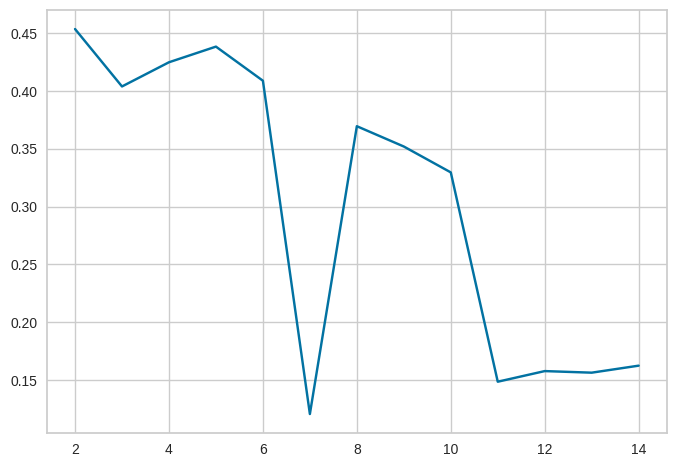

In [36]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_data))
    score = silhouette_score(k_means_data, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

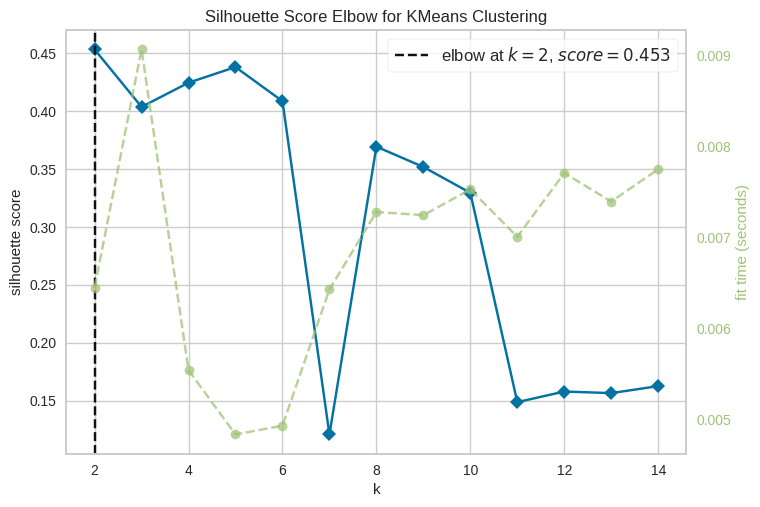

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [37]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_data)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

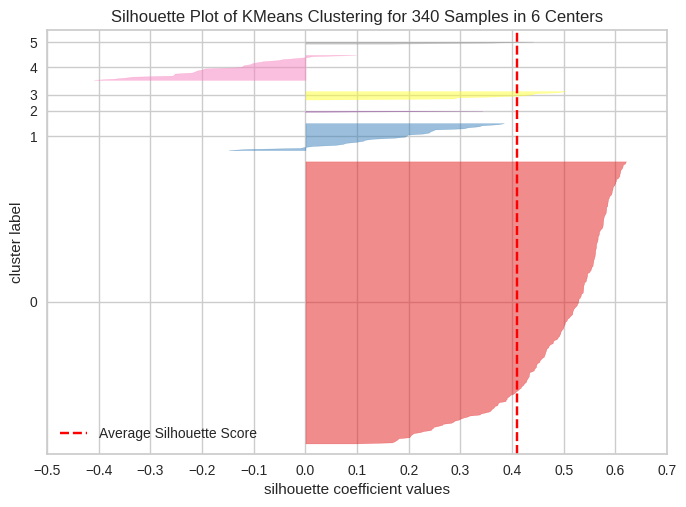

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [38]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_data)
visualizer.show()

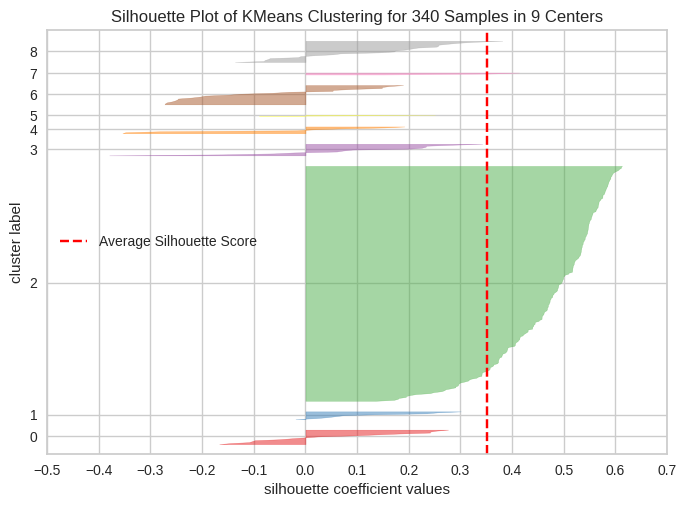

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [39]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(9, random_state=1))
visualizer.fit(subset_scaled_data)
visualizer.show()

#Final Model

We'll select 9 as the optimal number of clusters since the silhouette score is sufficiently high, and there's a noticeable kink at 9 in the elbow curve.

In [40]:
# final K-means model
kmeans = KMeans(n_clusters=9, random_state=1)  ## Complete the code to choose the number of clusters
kmeans.fit(k_means_data)

KMeans(n_clusters=9, random_state=1)

In [41]:
# creating a copy of the original data
data1 = data.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_data["KM_segments"] = kmeans.labels_
data1["KM_segments"] = kmeans.labels_

#Cluster Profiling

In [42]:
km_cluster_profile = data1.groupby("KM_segments")[numeric_columns].mean()

In [43]:
km_cluster_profile["count_in_each_segment"] = (
    data1.groupby("KM_segments")["Security"].count().values )

In [44]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,78.317709,17.072784,1.837829,30.937500,355.000000,282351312.500000,1045009937.500000,2.041875,826652504.337500,43.575343,8.327790,16
1,46.513334,-11.339513,2.528347,96.444444,57.888889,-896701333.333333,-6305921777.777778,-16.607778,445515335.960000,70.907059,0.959532,9
2,70.786021,5.434831,1.353096,20.114286,53.379592,16310469.387755,1449401085.714286,3.535204,428851023.545633,23.820076,-1.770027,245
3,48.103077,6.053507,1.163964,27.538462,77.230769,773230769.230769,14114923076.923077,3.958462,3918734987.169230,16.098039,-4.253404,13
4,508.534992,5.732177,1.504640,27.250000,150.875000,37895875.000000,1116994125.000000,15.965000,75654420.935000,43.727459,29.581664,8
5,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
6,90.797143,4.957495,1.462532,214.142857,40.380952,-93181142.857143,2195875523.809524,4.785714,443891905.006190,22.110362,-23.952239,21
7,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3
8,36.894297,-16.685444,2.792467,21.000000,45.652174,457884000.000000,-355319304.347826,-0.154783,472830352.019130,68.222052,1.828094,23


In [45]:
for cl in data1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(data1[data1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 6, the following companies are present:
['American Airlines Group' 'AbbVie' 'Allegion'
 'Affiliated Managers Group Inc' 'Anthem Inc.' 'Charter Communications'
 'Colgate-Palmolive' 'CME Group Inc.' 'Discovery Communications-A'
 'Discovery Communications-C' 'Expedia Inc.' 'IDEXX Laboratories'
 'Kimberly-Clark' 'Lockheed Martin Corp.' 'Masco Corp.' 'Altria Group Inc'
 'Pitney-Bowes' 'S&P Global, Inc.' 'United Continental Holdings'
 'United Parcel Service' 'Whirlpool Corp.']

In cluster 2, the following companies are present:
['Abbott Laboratories' 'Adobe Systems Inc' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Aon plc' 'Amphenol Corp'
 'Activision 

In [46]:
data1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary          3
             Consumer Staples                1
             Health Care                     5
             Information Technology          5
             Materials                       1
             Telecommunications Services     1
1            Energy                          8
             Materials                       1
2            Consumer Discretionary         28
             Consumer Staples               14
             Energy                          5
             Financials                     42
             Health Care                    24
             Industrials                    42
             Information Technology         23
             Materials                      15
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
3            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     3
             Information Technology          1
             Telecommunications Services     2
4            Consumer Discretionary          2
             Health Care                     4
             Information Technology          1
             Real Estate                     1
5            Energy                          2
6            Consumer Discretionary          5
             Consumer Staples                3
             Financials                      3
             Health Care                     3
             Industrials                     7
7            Consumer Discretionary          1
             Health Care                     1
             Information Technology          1
8            Energy                         14
             Industrials                     4
             Information Technology          2
             Materials                       3
Name: Security, dtype: int64

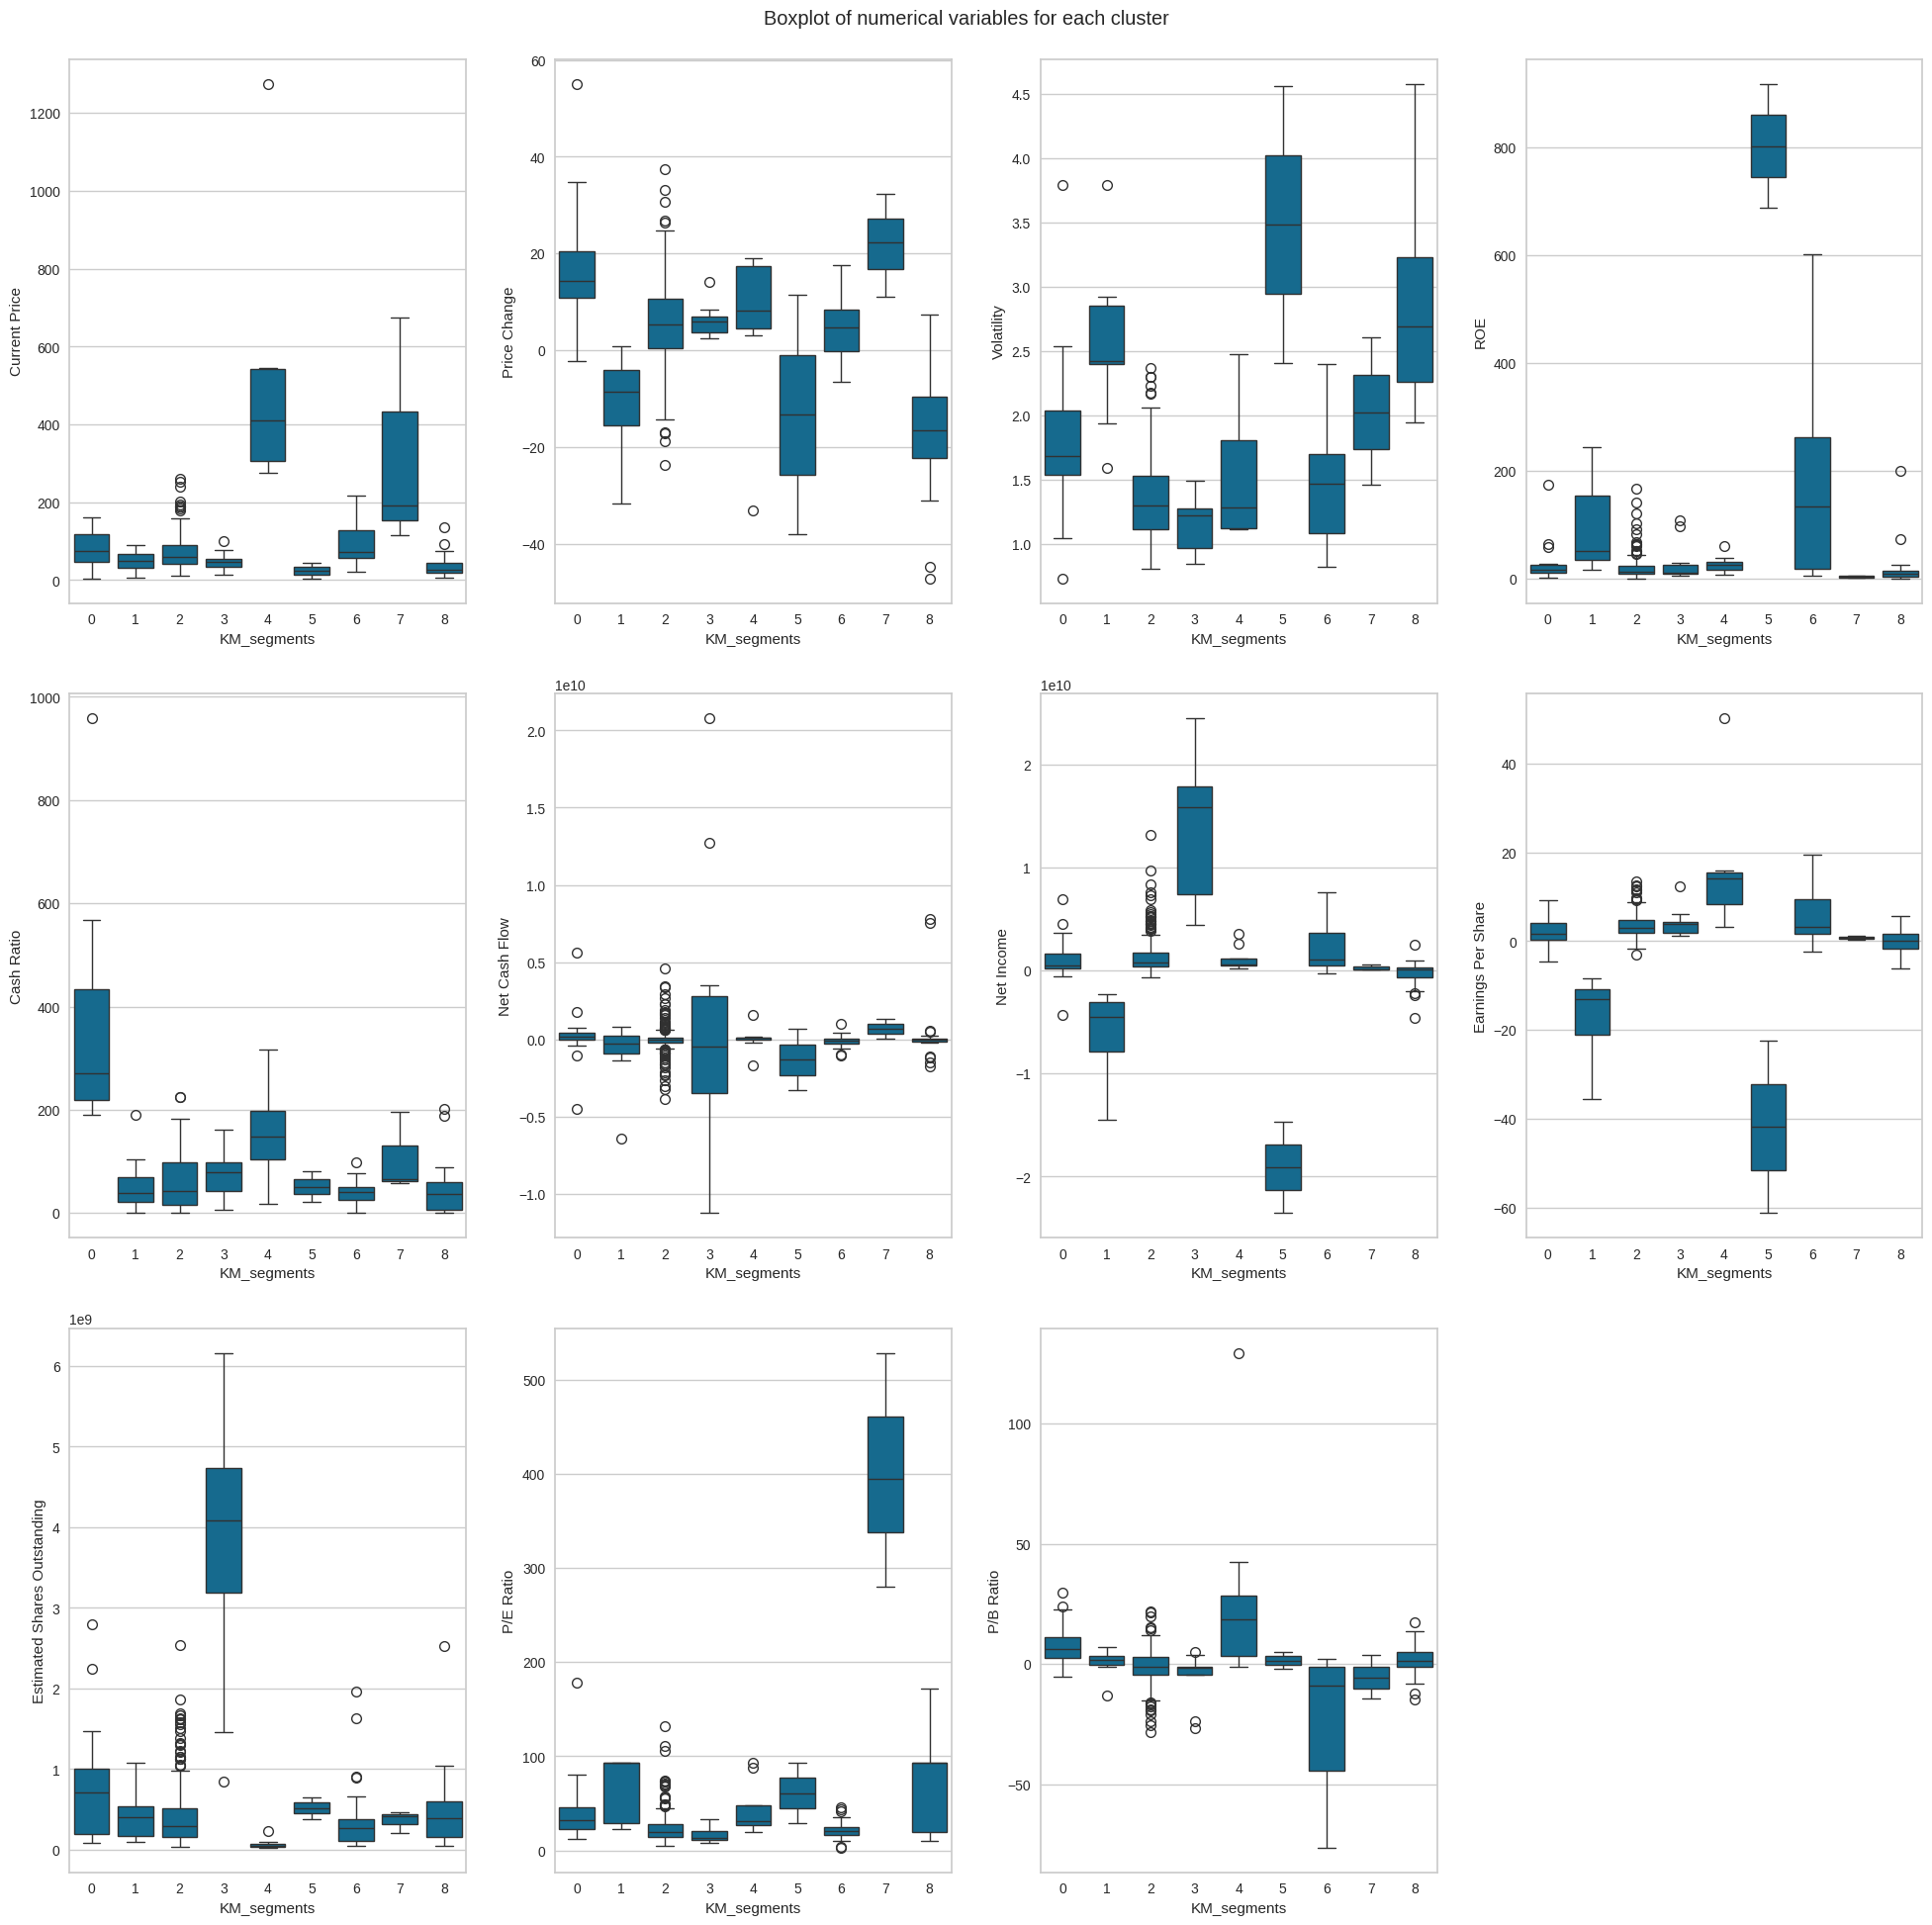

In [47]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data = data1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

### **Cluster Analysis**  

#### **Cluster 0:**  
- A **diverse cluster** with stocks from **around 10 sectors**.  
- Contains **average values** for most financial indicators.  
- **Outliers** are present in almost all variables.  
- **Lower P/E Ratio** compared to other clusters.  

#### **Cluster 1:**  
- Stocks belong to **around 4 sectors**.  
- **ROE, Earnings Per Share, Net Cash Flow, and P/B Ratio** are comparatively **lower**.  
- **Net Income, Price Change, and Current Price** are among the **lowest**.  
- Represents the **most volatile** group of stocks.  

#### **Cluster 2:**  
- Consists of stocks from **around 7 sectors**.  
- Though diverse, it has a **relatively smaller number of stocks**.  
- **High Cash Ratio, P/B Ratio, and Positive Price Change**.  
- **Lower average volatility** compared to other clusters.  

#### **Cluster 3:**  
- Includes stocks from **5 sectors**.  
- Similar to **Cluster 2**, it has **fewer stocks**.  
- **Highest Estimated Shares Outstanding and Net Income** among all clusters.  
- **Lower P/E Ratio, P/B Ratio, Average Price Change**, and **Net Cash Flow**.  

#### **Cluster 4:**  
- Comprises stocks from **5 sectors**.  
- **Highest average ROE** across all clusters.  
- **Lower average Cash Ratio, Earnings Per Share, and P/B Ratio**.  

#### **Cluster 5:**  
- Includes stocks from **10 sectors**.  
- The **largest cluster**, containing the **maximum number of stocks**.  
- **Higher average Earnings Per Share**.  

#### **Cluster 6:**  
- Consists of stocks from **2 sectors**.  
- The **smallest cluster**, containing **only 2 stocks**.  
- **Lowest Current Price and P/E Ratio** on average.  
- **Higher average Earnings Per Share and Net Cash Flow**.  

#### **Cluster 7:**  
- Includes stocks from **3 sectors**.  
- Contains **only 3 stocks**.  
- **Higher Current Price, Price Change, and P/E Ratio** on average.  
- **Lower P/B Ratio**.  

#### **Cluster 8:**  
- Comprises stocks from **4 sectors**.  
- **Higher average P/B Ratio and Earnings Per Share**.  
- **Lower Estimated Shares Outstanding**.

#Hierarchical Clustering

##Computing Cophenetic Correlation

In [48]:
hc_data = subset_scaled_data.copy()

In [49]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"] ## Complete the code to add distance metrics

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_data, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_data))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

##Let's examine various linkage methods using only Euclidean distance.

In [50]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_data, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_data))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


##Let's visualize the dendrograms for various linkage methods.

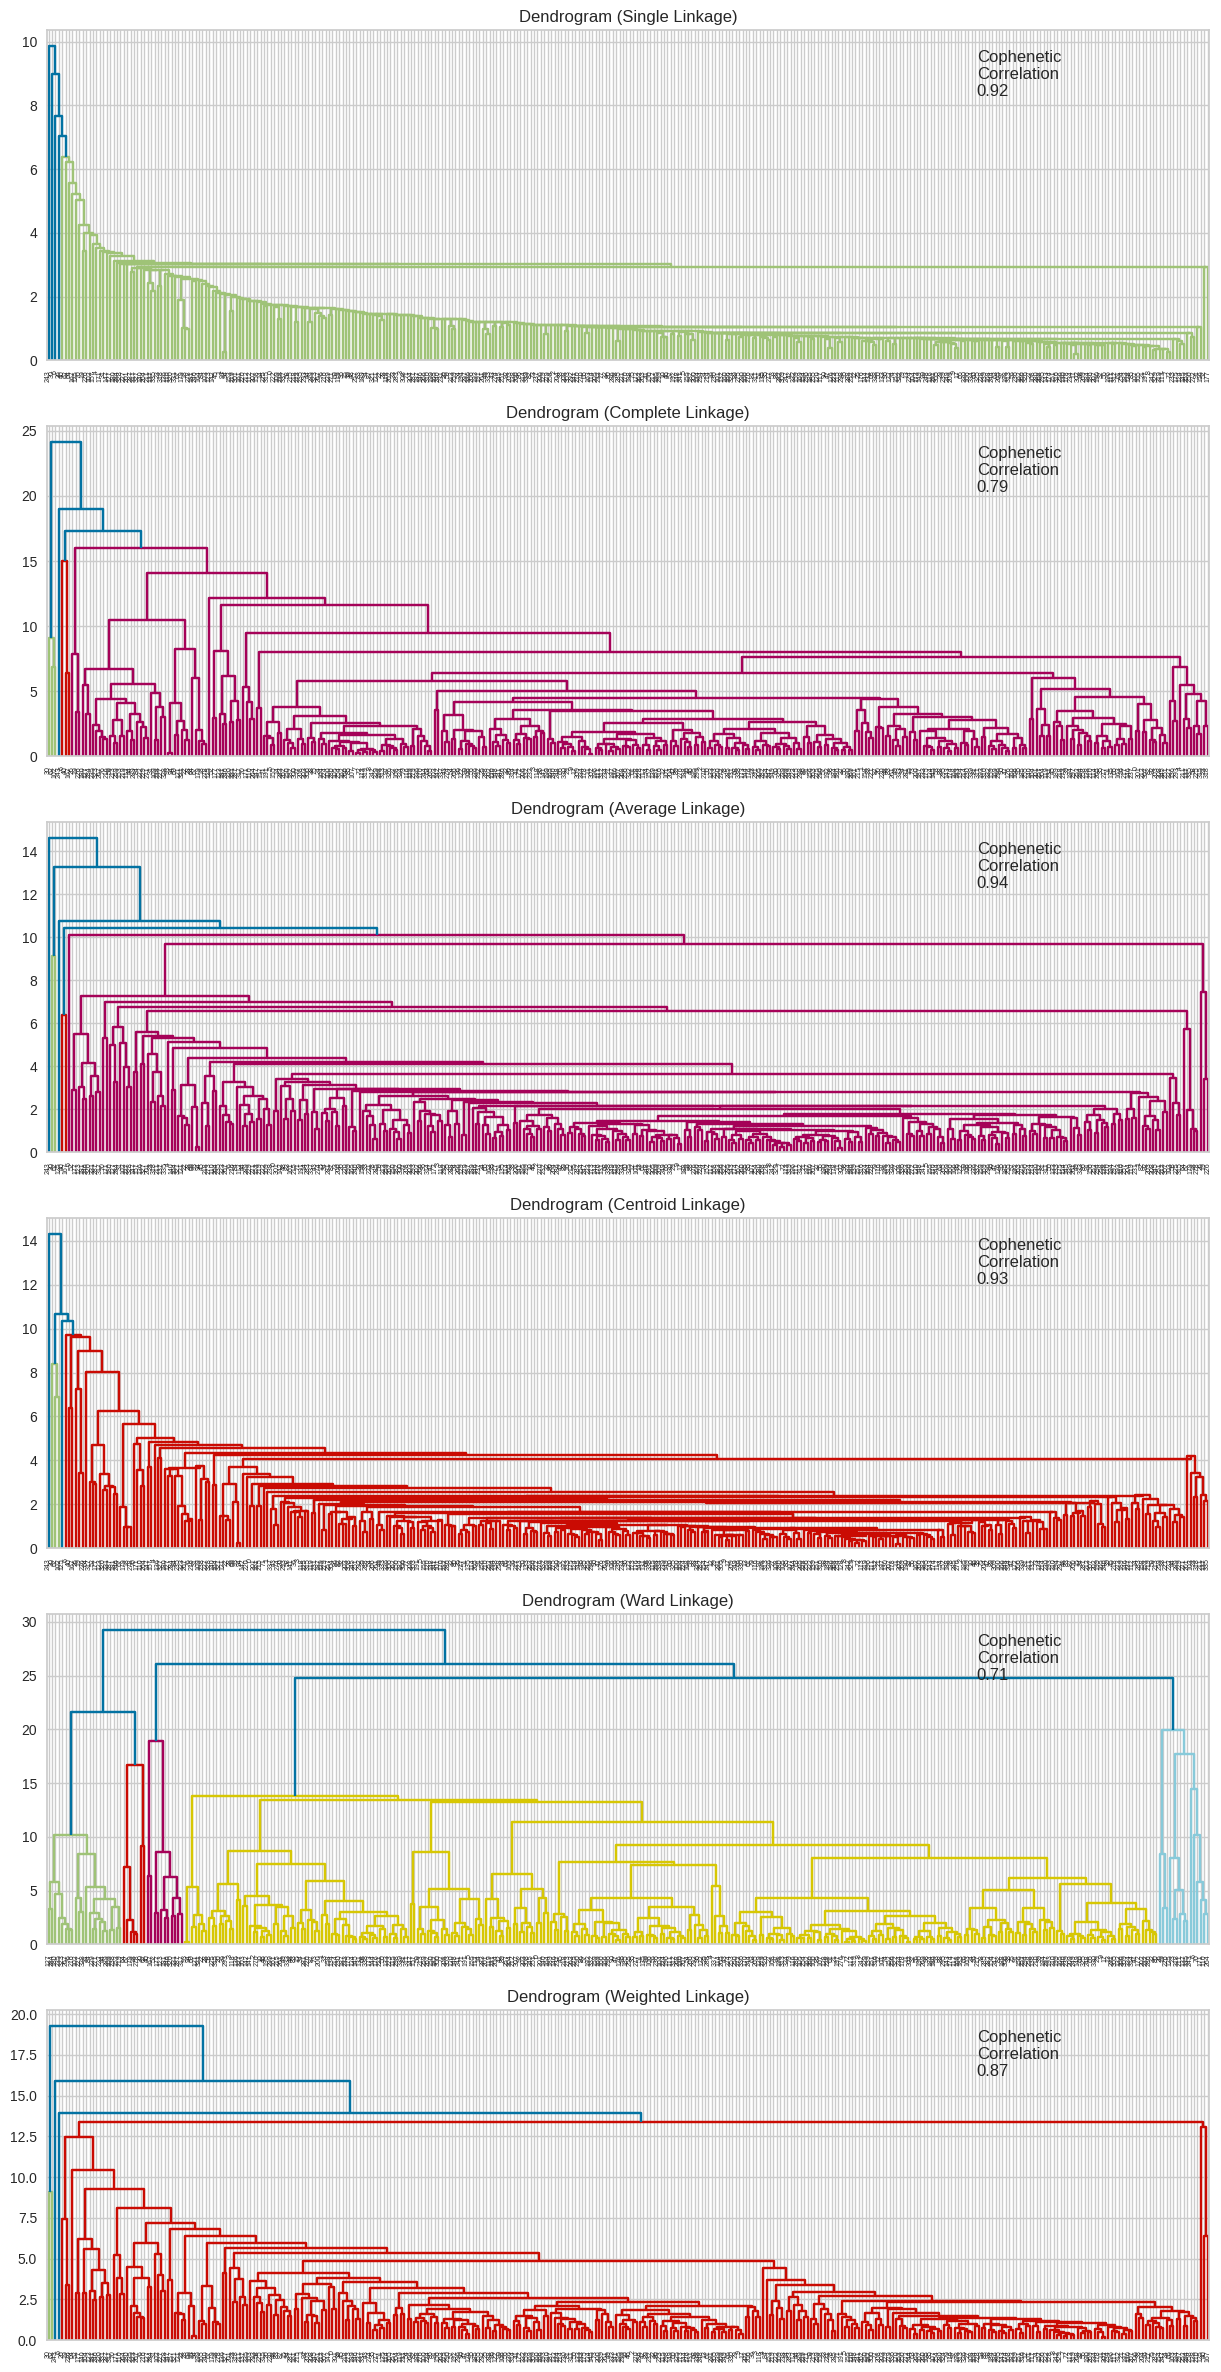

In [51]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_data, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_data))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [52]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254


Let's use Ward linkage, as its dendrogram shows more distinct and well-separated clusters. Based on the dendrogram, 6 seems to be the optimal number of clusters for Ward linkage.

## SKLEARN Model

In [53]:
HCmodel = AgglomerativeClustering(n_clusters=6, linkage="ward")
HCmodel.fit(hc_data)

AgglomerativeClustering(n_clusters=6)

In [54]:
# creating a copy of the original data
data2 = data.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_data["HC_segments"] = HCmodel.labels_
data2["HC_segments"] = HCmodel.labels_

#Cluster Profiling

In [55]:
hc_cluster_profile = data2.groupby("HC_segments").agg({col: 'mean' for col in data2.select_dtypes(include=np.number).columns})

In [56]:
hc_cluster_profile["count_in_each_segment"] = (
    data2.groupby("HC_segments")["Security"].count().values  ## Complete the code to groupby the cluster labels
)

In [57]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,HC_segments,count_in_each_segment
HC_segments,,,,,,,,,,,,,
0,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,0.000000,11
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,1.000000,7
2,325.996105,7.724708,1.545762,17.000000,360.333333,186503166.666667,1008736416.666667,9.544167,589434517.801667,41.121871,25.258283,2.000000,12
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,3.000000,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,4.000000,22
5,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,5.000000,3


In [58]:
## Complete the code to print the companies in each cluster
for cl in data2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(data2[data2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Lim

In [59]:
data2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
1            Consumer Discretionary          1
             Consumer Staples                2
             Energy                          2
             Financials                      1
             Industrials                     1
2            Consumer Discretionary          2
             Consumer Staples                1
             Health Care                     4
             Information Technology          3
             Real Estate                     1
             Telecommunications Services     1
3            Consumer Discretionary         35
             Consumer Staples               15
             Energy                          7
             Financials                     44
             Health Care                    34
             Industrials                    52
             Information Technology         27
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
4            Energy                         20
             Information Technology          1
             Materials                       1
5            Consumer Discretionary          1
             Health Care                     1
             Information Technology          1
Name: Security, dtype: int64

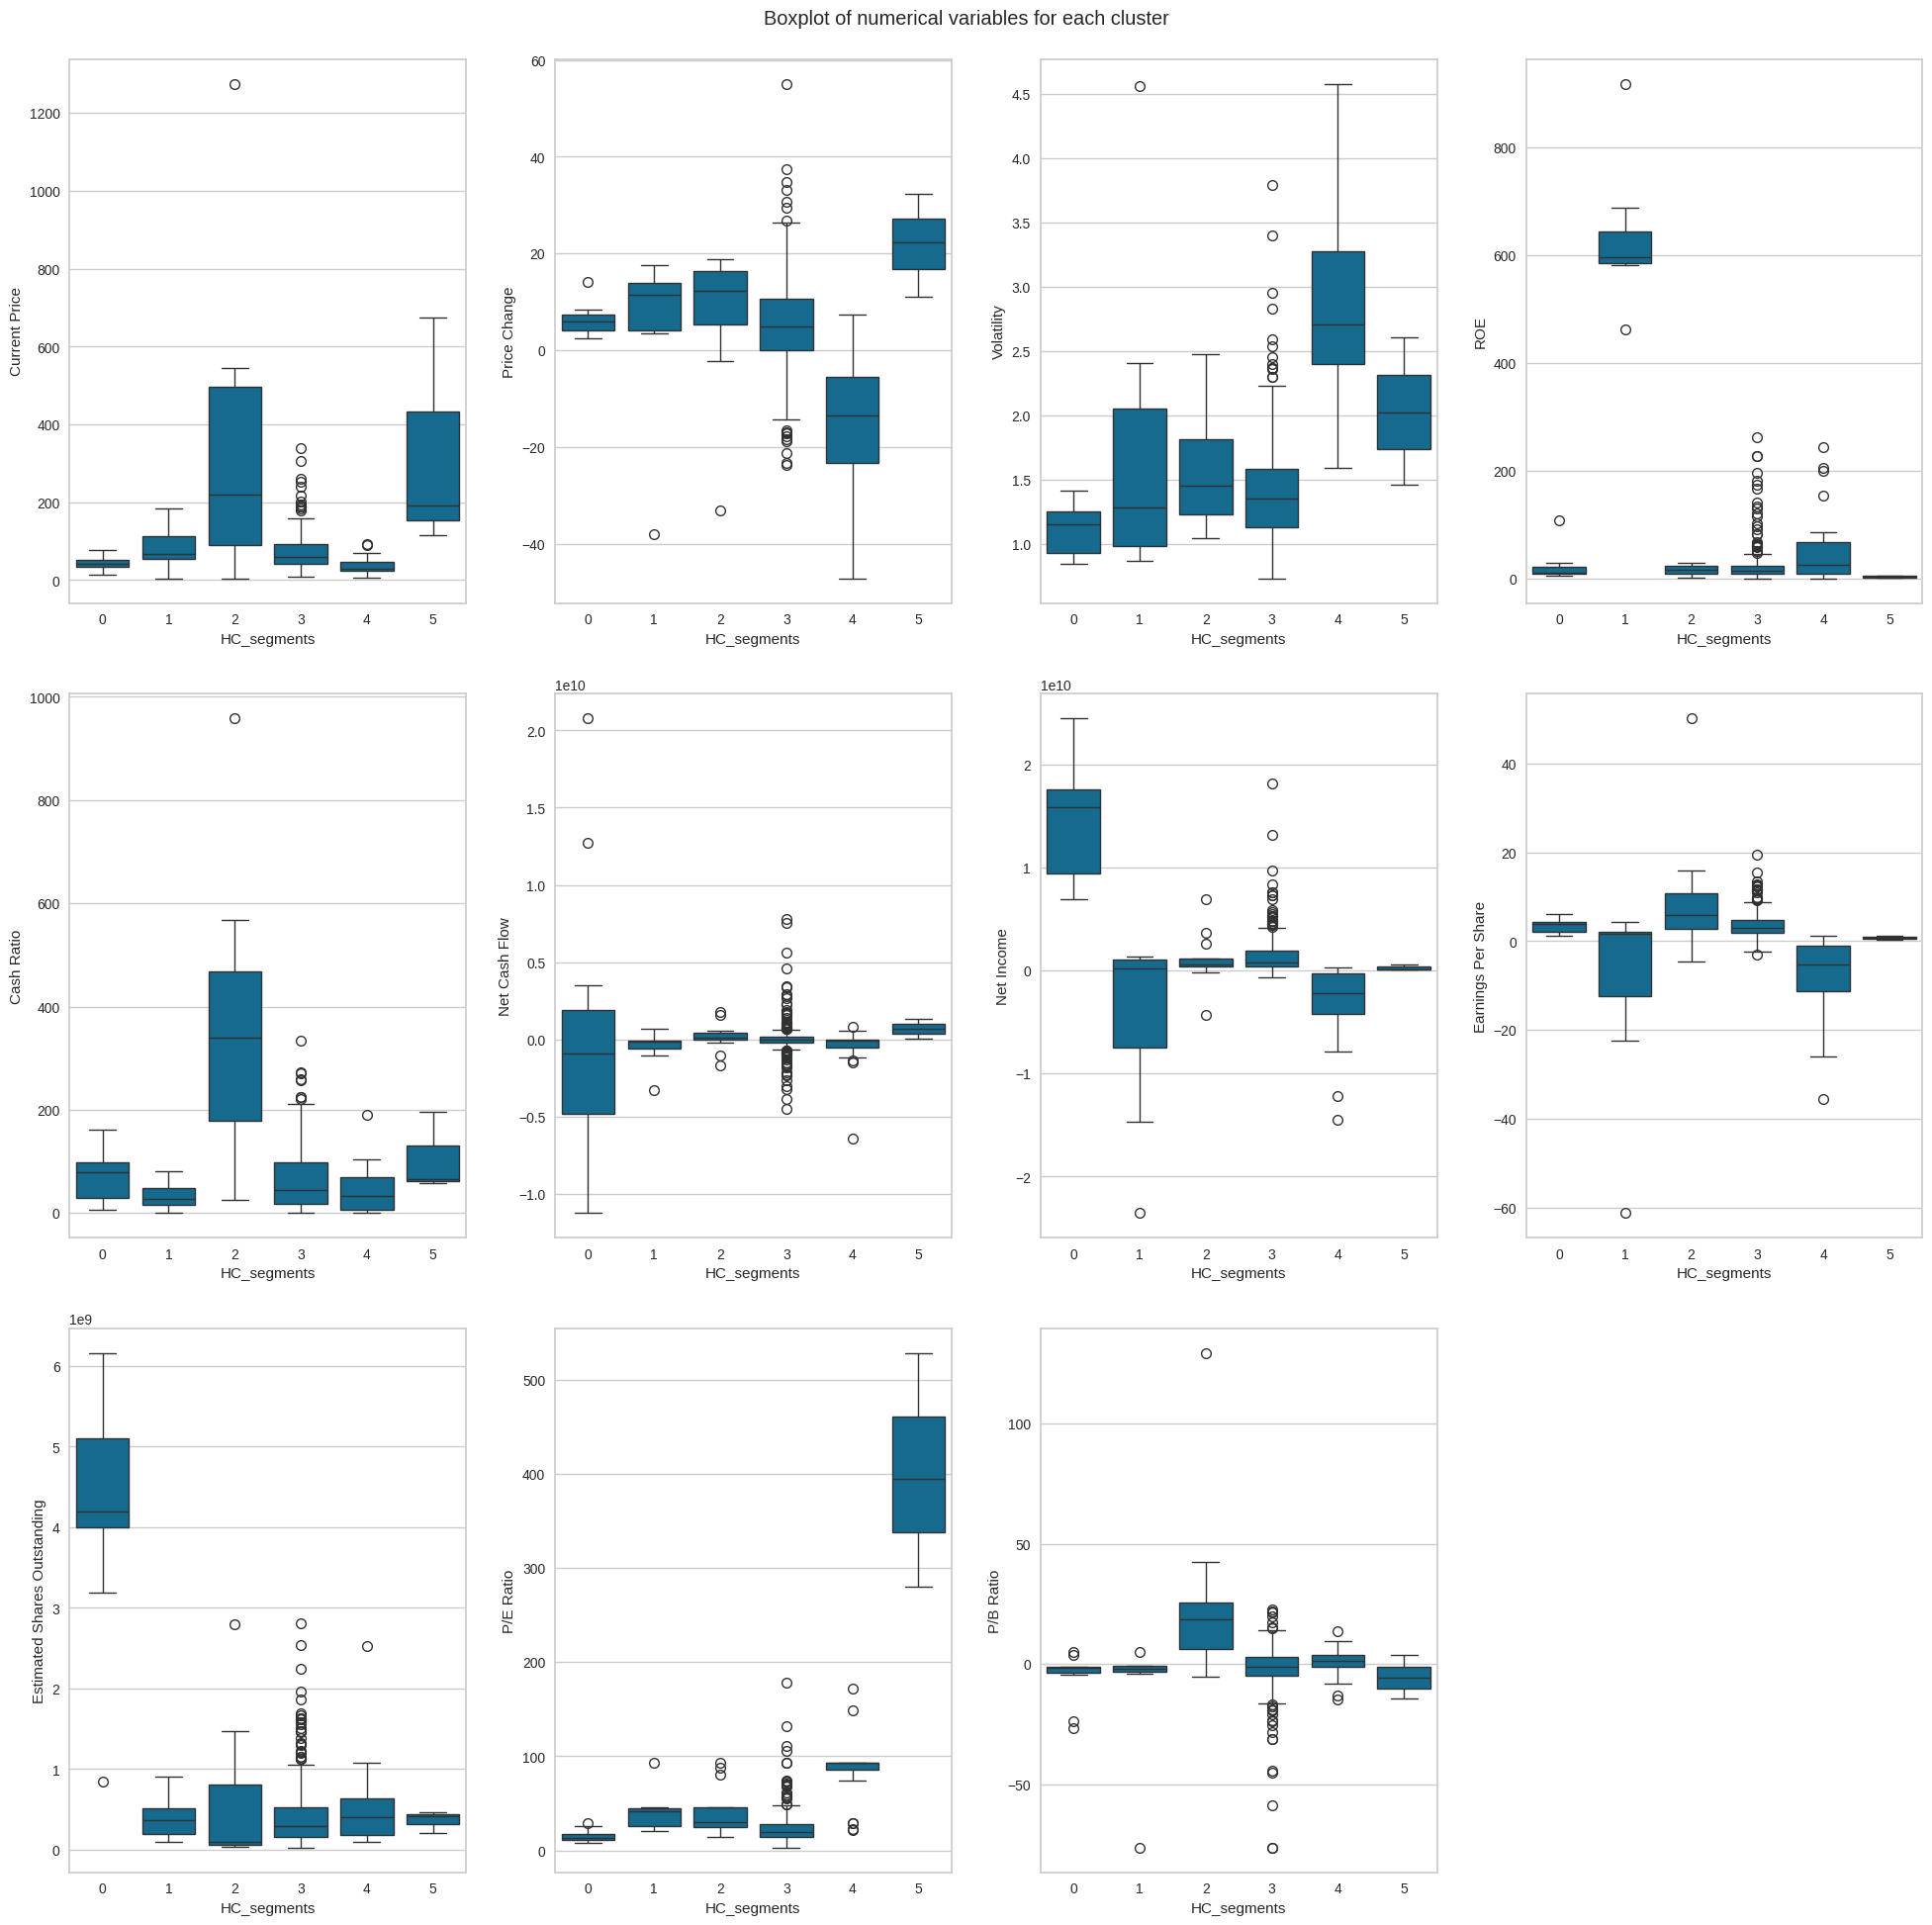

In [60]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=data2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

### **Cluster Insights from Hierarchical Clustering (HC Segments)**  

#### **Cluster 0**  
- **Stocks from 6 sectors**: Consumer Discretionary, Consumer Staples, Energy, Financials, Health Care, IT, and Telecommunications.  
- **Higher average**: Current Price and Earnings Per Share.  
- **Lower average**: Estimated Shares Outstanding.  

#### **Cluster 1**  
- **Stocks from 5 sectors**: Consumer Discretionary, Consumer Staples, Energy, Financials, and Industrials.  
- **Higher average**: Volatility.  
- **Lower average**: ROE and Earnings Per Share.  

#### **Cluster 2**  
- **Stocks from 6 sectors**: Consumer Discretionary, Consumer Staples, Health Care, IT, Real Estate, and Telecommunications.  
- **Higher average**: ROE and Cash Ratio.  
- **Lower average**: Price Change, making it a low-risk cluster.  

#### **Cluster 3**  
- **Most diversified cluster** with **stocks from 11 sectors**, including Financials, Industrials, Health Care, and IT.  
- **Higher average**: Earnings Per Share and Net Income.  
- **Lower average**: Volatility, making it a balanced portfolio.  

#### **Cluster 4**  
- **Stocks from 3 sectors**: Energy, IT, and Materials.  
- **Higher average**: Volatility, making it a high-risk cluster.  
- **Lower average**: Earnings Per Share.  

#### **Cluster 5**  
- **Smallest cluster** with **stocks from 3 sectors**: Consumer Discretionary, Health Care, and IT.  
- **Higher average**: Current Price and P/E Ratio.  
- **Lower average**: P/B Ratio, indicating undervaluation.

## **Conclusion and Business Recommendations**


### **Conclusions:**
### **Comparison of K-Means and Hierarchical Clustering**  

- **Hierarchical Clustering (HC) provides more balanced clusters**, while **K-Means (KM) has some highly concentrated clusters** (e.g., KM Cluster 2).  
- **HC Cluster 3 and KM Cluster 0 offer a diverse and stable portfolio**, while **HC Cluster 4 and KM Cluster 1 contain highly volatile stocks**, mainly from the Energy sector.  
- **HC Cluster 3 and KM Cluster 0 have higher EPS and Net Income**, making them suitable for safer investments.  
- **HC Cluster 4 and KM Cluster 8 contain the most volatile stocks**, posing higher investment risks.  
- **K-Means is faster and better for large datasets**, whereas **Hierarchical Clustering is more meaningful for small datasets**.  
- **For stability, HC Cluster 3 and KM Cluster 0 are ideal, while high-risk investors may consider HC Cluster 4 and KM Cluster 1**.

### **Business Recommendations:**
- **Both K-Means and Hierarchical clustering** were analyzed for clustering the provided data.  

- **Hierarchical clustering** produced **well-diversified clusters** with a **balanced distribution** across multiple groups, while **K-Means** had a few clusters with **highly concentrated** stocks.  

- Since the dataset is **small**, **Hierarchical clustering** is **preferable**; however, as the dataset grows, **K-Means** is a better option due to its **computational efficiency**.  

- **Clusters were formed based on sector classification and feature values**, grouping stocks with **similar characteristics**.  

- **Hierarchical Cluster 3 and K-Means Cluster 0** offer a **balanced portfolio** with **higher EPS and net income**, making them **ideal for moderate-risk investors** seeking **stable investments**.  

- **Hierarchical Cluster 4 and K-Means Cluster 8** contain **highly volatile stocks**, particularly from the **Energy sector**, with **negative price changes and lower EPS**, making them **risky investments**.  

- **K-Means Cluster 2** is **highly concentrated** but **diverse across sectors**—**further analysis** is recommended before investing in this cluster.  

- **K-Means** is **faster** and suitable for **larger datasets** or when **real-time clustering** is needed, while **Hierarchical clustering** is better for **understanding market trends** and **risk assessment**.  

- **Moderate-risk investors** should focus on **HC Cluster 3 and KM Cluster 0**, while **high-risk investors** can explore **HC Cluster 4 and KM Cluster 1** for potential opportunities.











